In [ ]:
#1. INTRODUCTION

In [1]:
# All neccessary packages:
import numpy as np
import pandas as pd
import random
import warnings
import math
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics   import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold

# 1. INTRODUCTION
Data used in this report is taken from the UCI Machine Learning Repository. It consists of 41188 instances and 21 variables. This dataset concerns the telemarketing campaign of a bank, which was performed in order to increase the number of subscriptions to term deposit accounts. 

This report was conducted by building machine learning models, Logistic Regression, Random Forest and K-Nearest Nighbours, to predict the outcome of the marketing campaign for each client (classification problem).
The task is to predict the results of the marketing campaign for each customer.
Thanks to the outcome the bank could save time and money as it will be able to focus its marketing efforts on the clients that are most likely to opean a term deposit account. 

The output variable (desired target) is a binary variable, which has values 'yes' and 'no', it answers the question whether the client subscribed a term deposit.
Other variables are of categorical and numeric type. They will be analysed in the further parts.

In [2]:
# Showing the table:
df=pd.read_csv("bank-additional-full.csv",sep=';')
print(df.shape)
df.head()
# Desired target is at the end of the table (y). 
# It answers the question if the customer subscribed a term deposit.

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There is 41188 rows and 21 columns.

In [4]:
# Changing the name of the column y to target.
df = df.rename(columns = {'y': 'target'}, inplace = False)

# 2. CLEANING AND PREPROCESSING DATA

Missing data

In [7]:
# Identifying the number of missing values in the dataset.
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(df)
print(missing_data)
# There is no missing data.

                Total  Percent
age                 0      0.0
campaign            0      0.0
nr.employed         0      0.0
euribor3m           0      0.0
cons.conf.idx       0      0.0
cons.price.idx      0      0.0
emp.var.rate        0      0.0
poutcome            0      0.0
previous            0      0.0
pdays               0      0.0
duration            0      0.0
job                 0      0.0
day_of_week         0      0.0
month               0      0.0
contact             0      0.0
loan                0      0.0
housing             0      0.0
default             0      0.0
education           0      0.0
marital             0      0.0
target              0      0.0


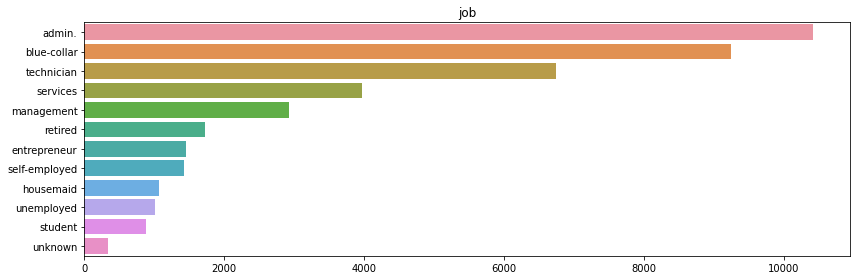

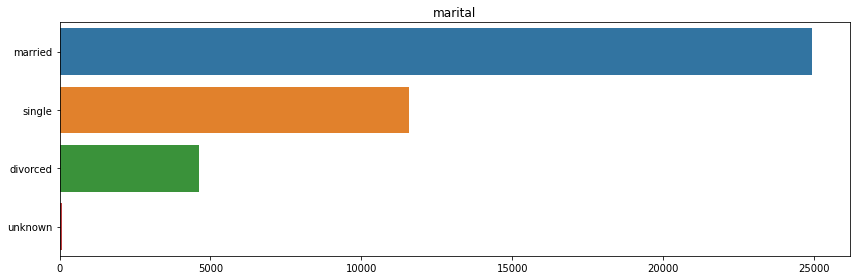

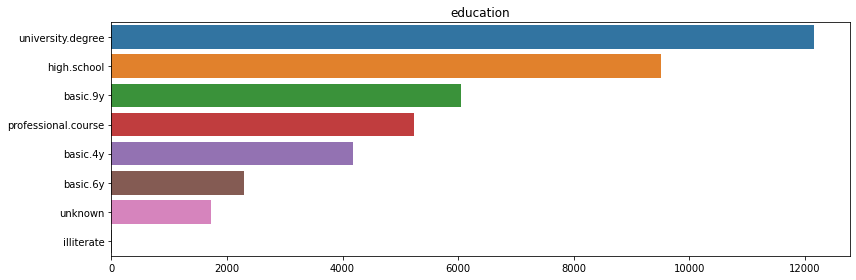

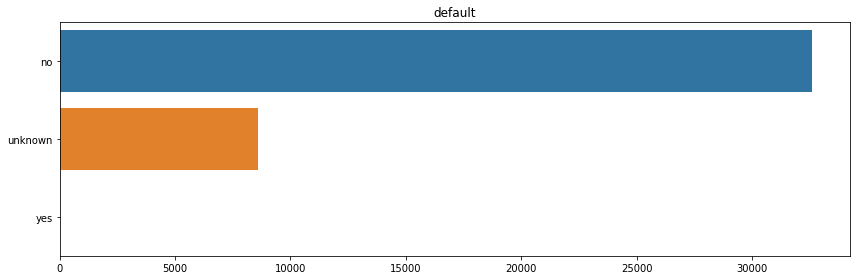

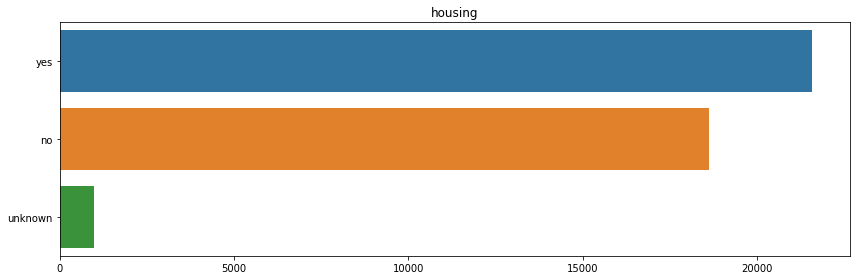

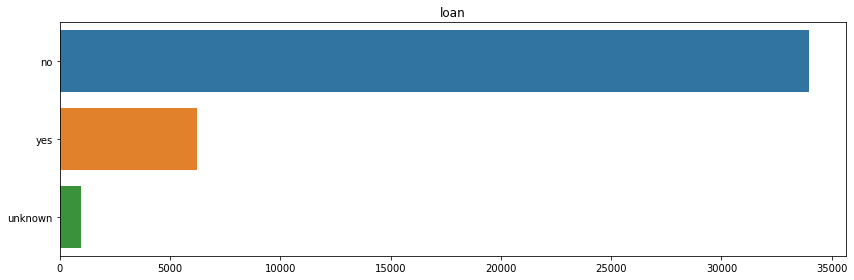

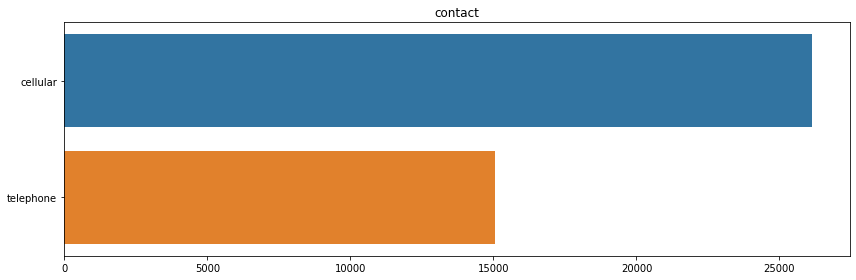

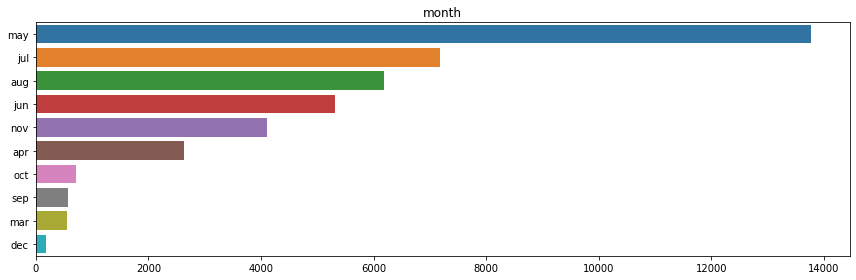

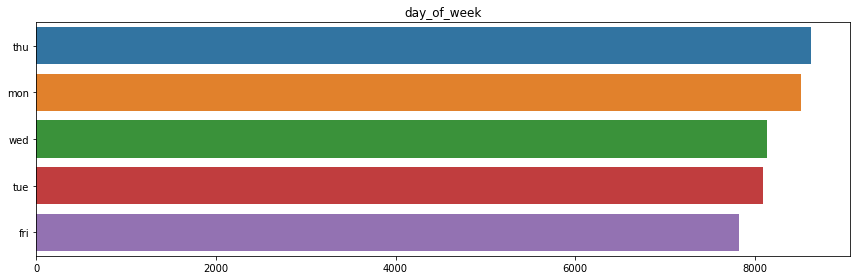

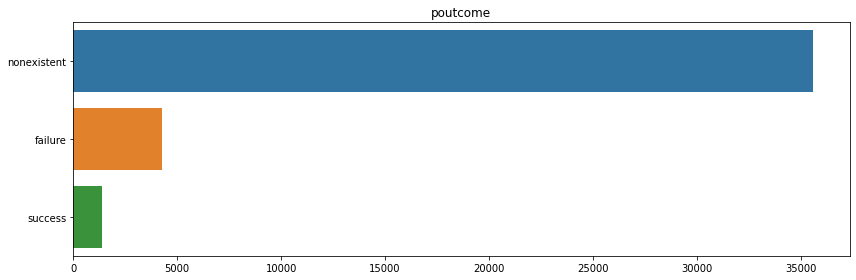

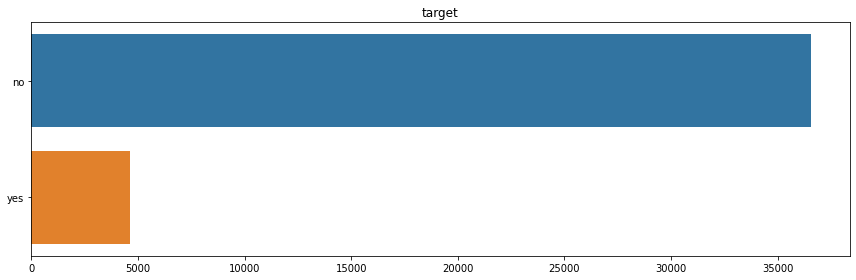

In [8]:
# Creating bar plots for categorical variables to see if they cointain "unknowns":
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','target']
for col in cat:
    plt.figure(figsize=(12,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

Job, marital, education, default, housing, loan, poutcome all contain "unknows".

In [10]:
# Checking if we can impute 'retired' based on the age above 60
df['job'][df['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

In [11]:
# Imputing retired for uknown job of people over 60
df.loc[(df["age"]>60) & (df["job"]=='unknown'), 'job'] = 'retired'

In [12]:
# Checking for pattern in assessing job and education:
crossTab = pd.crosstab(df.job, df.education)

In [13]:
crossTab

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,601,75,145,276,3,243,286,112
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [14]:
# Predicting job and education based on the crosstab
edu_values = crossTab.idxmax(axis=1) # Predicting education
job_values = crossTab.idxmax(axis=0)# Predicting job

In [15]:
edu_values

job
admin.             university.degree
blue-collar                 basic.9y
entrepreneur       university.degree
housemaid                   basic.4y
management         university.degree
retired                     basic.4y
self-employed      university.degree
services                 high.school
student                  high.school
technician       professional.course
unemployed         university.degree
unknown                      unknown
dtype: object

In [16]:
job_values

education
basic.4y               blue-collar
basic.6y               blue-collar
basic.9y               blue-collar
high.school                 admin.
illiterate             blue-collar
professional.course     technician
university.degree           admin.
unknown                blue-collar
dtype: object

In [17]:
# Randomly choosing a job and then predicting education based on it to avoid unknowns
df.loc[(df['education']=='unknown') & (df['job']=='unknown'),'job'] = random.choice(job_values)

In [18]:
# Inffering job and education based on observations for the output above:
for i in edu_values.keys(): # Inferring education based on job
    df.loc[(df['education'] =='unknown') & (df['job'] == i),'education'] = edu_values[i]
for i in job_values.keys(): # Inferring job based on education 
    df.loc[(df['job'] =='unknown') & (df['education'] == i),'job'] = job_values[i]

In [19]:
# Job:Checking if there are still unkonwn. There are not.
print(df.groupby(['job']).size() / len(df)*100)

job
admin.           25.500146
blue-collar      22.996989
entrepreneur      3.535010
housemaid         2.573565
management        7.099155
retired           4.226959
self-employed     3.450034
services          9.636302
student           2.124405
technician       16.395552
unemployed        2.461882
dtype: float64


In [20]:
# Education:Checking if there are still unkonwn. There are not.
print(df.groupby(['education']).size() / len(df)*100)

education
basic.4y               10.512771
basic.6y                5.564728
basic.9y               16.062931
high.school            23.871030
illiterate              0.043702
professional.course    13.244149
university.degree      30.700690
dtype: float64


In [21]:
print(df.groupby(['marital']).size() / len(df)*100)

marital
divorced    11.197436
married     60.522482
single      28.085850
unknown      0.194231
dtype: float64


In [22]:
# Changing unknown marital statuts (0,19%) to married, because it is over 60% of the dataset.
df.loc[(df['marital']=='unknown'), 'marital'] = 'married'

In [23]:
# Checking default and poutcome as based on the graph they have a lot unknowns
print(df.groupby(['default']).size() / len(df)*100)
print(df.groupby(['poutcome']).size() / len(df)*100)
# "default" and "potcome" variables will be deleted.

default
no         79.120132
unknown    20.872584
yes         0.007284
dtype: float64
poutcome
failure        10.323395
nonexistent    86.343110
success         3.333495
dtype: float64


In [24]:
del df['default']
del df['poutcome']

In [25]:
# Loan and housing inferring based on job:
job_housing=pd.crosstab(df.job, df.housing)
job_loan=pd.crosstab(df.job, df.loan)
print(job_housing)
print(job_loan)

housing          no  unknown   yes
job                               
admin.         4671      229  5603
blue-collar    4412      243  4817
entrepreneur    641       36   779
housemaid       491       29   540
management     1363       71  1490
retired         789       44   908
self-employed   641       40   740
services       1818      101  2050
student         381       23   471
technician     2985      147  3621
unemployed      430       27   557
loan             no  unknown   yes
job                               
admin.         8548      229  1726
blue-collar    7829      243  1400
entrepreneur   1214       36   206
housemaid       877       29   154
management     2414       71   439
retired        1452       44   245
self-employed  1186       40   195
services       3267      101   601
student         710       23   142
technician     5615      147   991
unemployed      838       27   149


In [26]:
def fillhousing(df,job_housing):
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((job_housing.loc[j]['no'])/(job_housing.loc[j]['no']+job_housing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

In [27]:
def fillloan(df,job_loan):
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((job_loan.loc[j]['no'])/(job_loan.loc[j]['no']+job_loan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [28]:
df=fillhousing(df,job_housing)

In [29]:
df=fillloan(df,job_loan)

In [30]:
# Housing and loan: Checking if there are still unkonwn. There are not.
print(df.groupby(['housing']).size() / len(df)*100)
print(df.groupby(['loan']).size() / len(df)*100)

housing
no     46.3266
yes    53.6734
dtype: float64
loan
no     84.446926
yes    15.553074
dtype: float64


In [31]:
# Checking for class imbalance:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(df['target'])
# There is rather high imbalance, 89% said 'no' to subscribing to the term deposit and only 11% said 'yes'.

no     88.734583
yes    11.265417
Name: target, dtype: float64

Dealing with outliers, encoding, standarization will be done in EDA part.

# 3.EDA

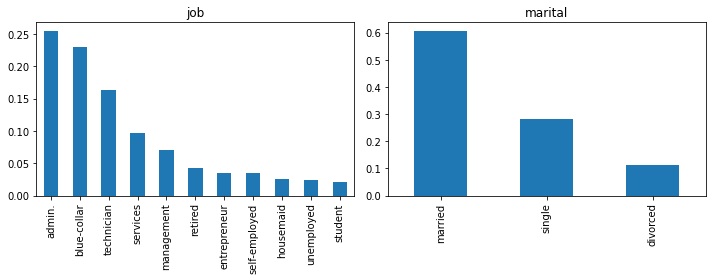

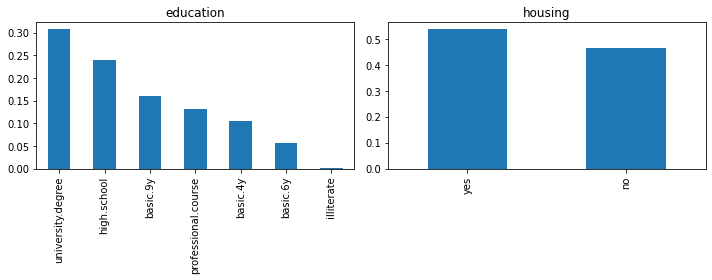

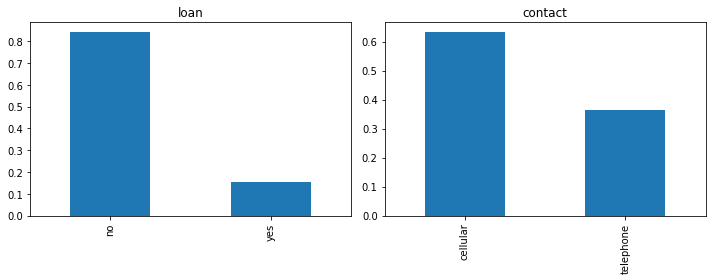

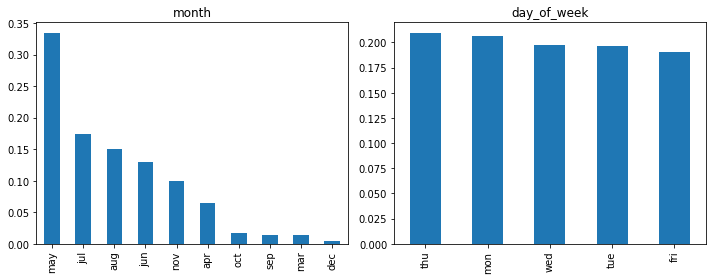

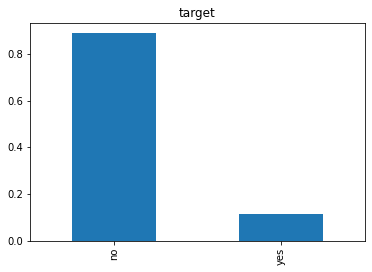

In [34]:
# Plotting categorical variables
def plot_cat(df):
    cat_columns = df.select_dtypes(include=['object']).columns
    
    for i in range(0,len(cat_columns),2):
            if len(cat_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                df[cat_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(cat_columns[i])
                plt.subplot(122)     
                df[cat_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(cat_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                df[cat_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(cat_columns[i])
                
plot = plot_cat(df)

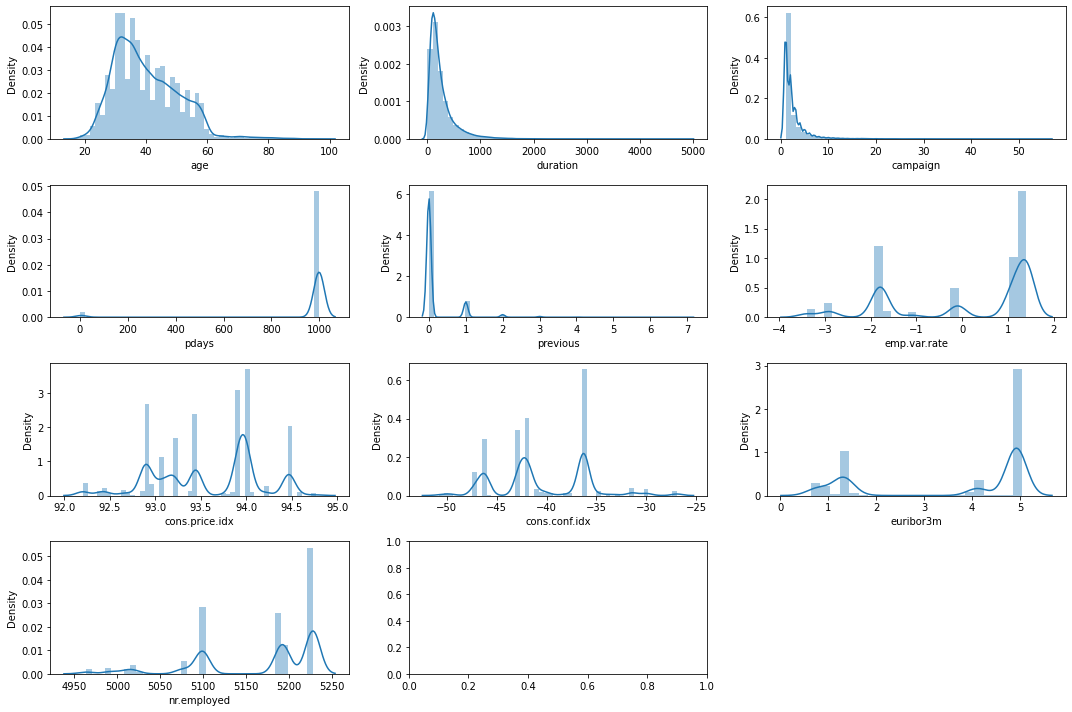

In [35]:
# Plotting numerical variables
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
fig, axes = plt.subplots(4,3,figsize=[15,10])
numeric_columns=df.select_dtypes(include=np.number).columns
for i, col in enumerate(numeric_columns):
    sns.distplot(df[col],ax=axes[i//3,i%3])
fig.delaxes(axes[3,2])
plt.tight_layout()

As can be seen, data is not evenly distributed, therefore it will be standardized.

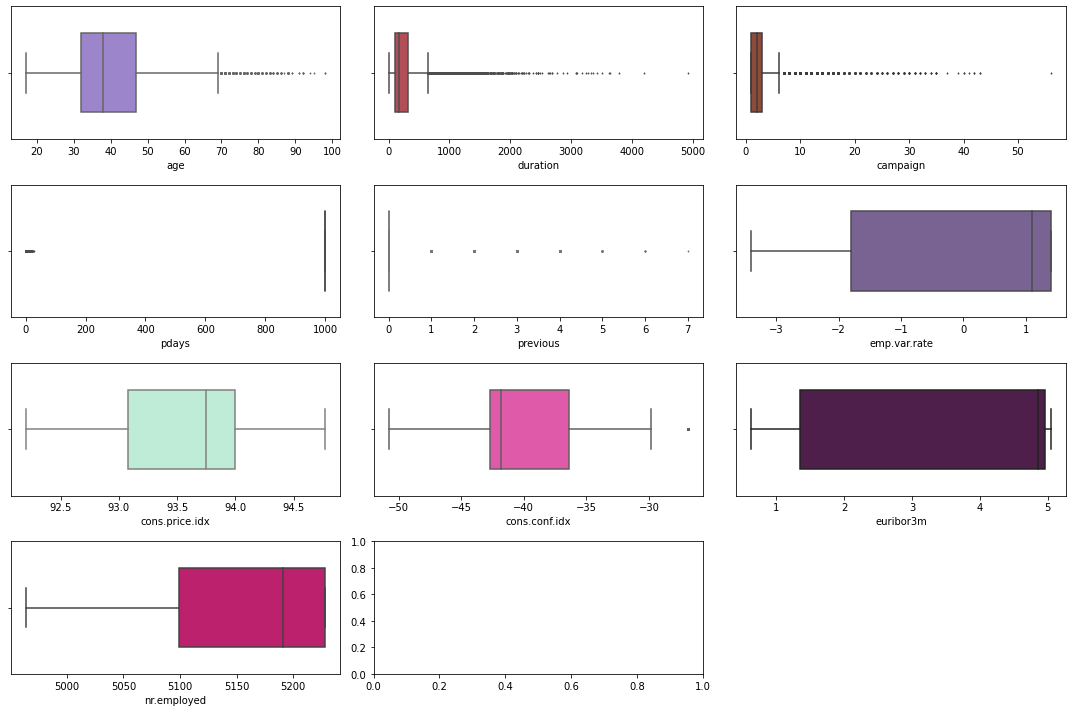

In [37]:
# Boxplots
fig, axes = plt.subplots(4,3,figsize=[15,10])
numeric_columns=df.select_dtypes(include=np.number).columns
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=col,color=np.random.rand(3,), data=df, ax=axes[i//3,i%3],fliersize=1,width=0.6)
fig.delaxes(axes[3,2])
plt.tight_layout()

In [38]:
# Deleting pdays and previous as they contain very little information:
del df['pdays']
del df['previous']

In [39]:
# From the graphs it can be seen there are some outliers - checking for outliers:
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns=['Feature','Number of outliers'])
    
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            # First quartile
            q1 = df[column].quantile(0.25)            
            # Third quartile
            q3 = df[column].quantile(0.75)            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of outliers
0,age,469
1,duration,2963
2,campaign,2406
3,emp.var.rate,0
4,cons.price.idx,0
5,cons.conf.idx,447
6,euribor3m,0
7,nr.employed,0


In [40]:
# Getting rid of outliers - method of winsorization (confidence interval of 90%)
# Replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile.
def out_outliers(df):
    cols = list(df)
    for col in cols:
        if col in df.select_dtypes(include=np.number).columns:
            df[col] = winsorize(df[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return df   


df = out_outliers(df)

# Checking for outliers after applying winsorization
detect_outliers(df)

,Feature,Number of outliers
0,age,0
1,duration,0
2,campaign,0
3,emp.var.rate,0
4,cons.price.idx,0
5,cons.conf.idx,0
6,euribor3m,0
7,nr.employed,0


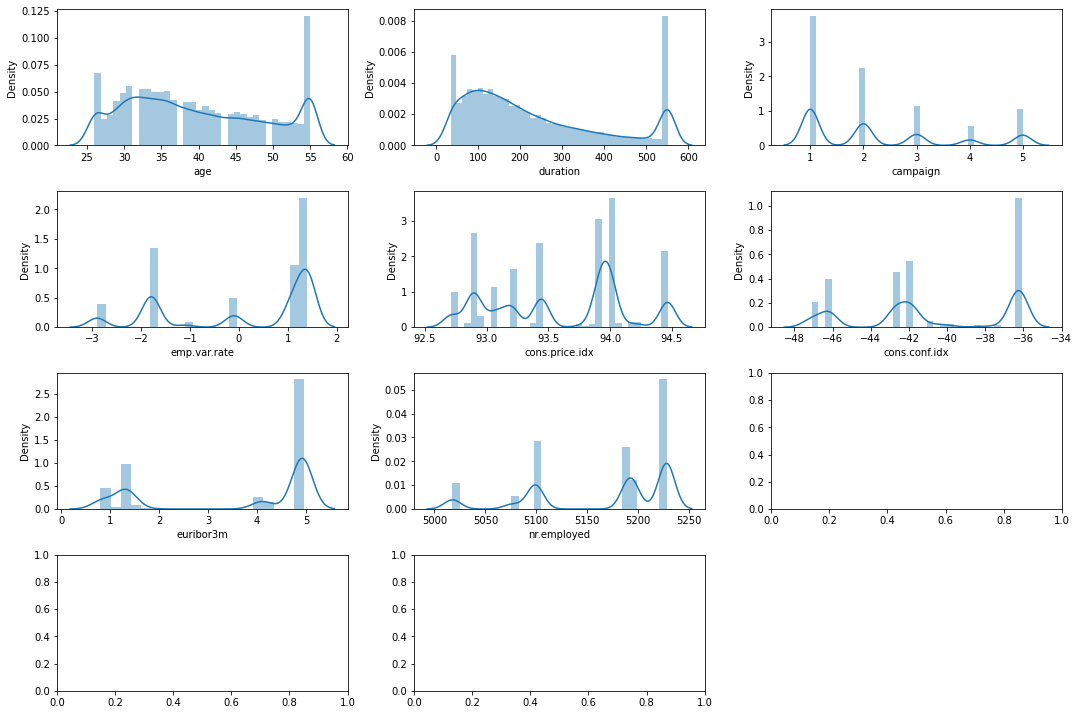

In [41]:
fig, axes = plt.subplots(4,3,figsize=[15,10])
numeric_columns=df.select_dtypes(include=np.number).columns
for i, col in enumerate(numeric_columns):
    sns.distplot(df[col],ax=axes[i//3,i%3])
fig.delaxes(axes[3,2])
plt.tight_layout()

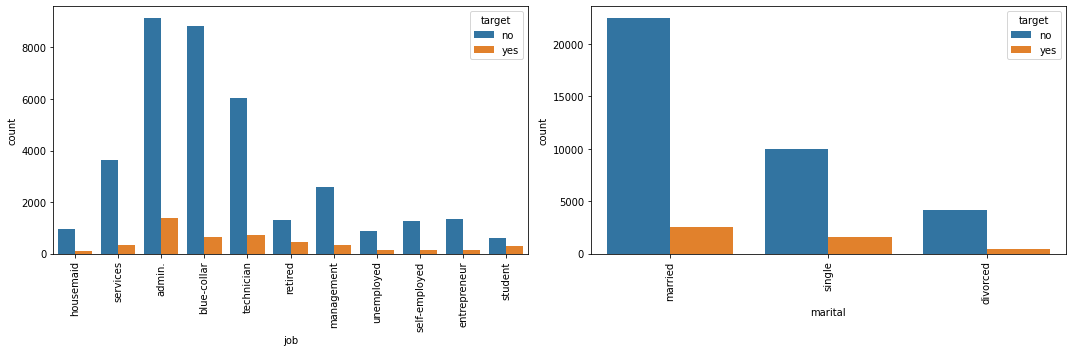

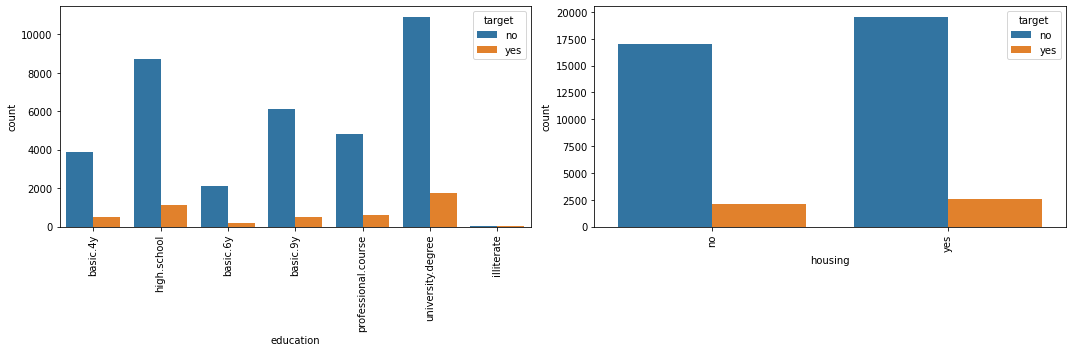

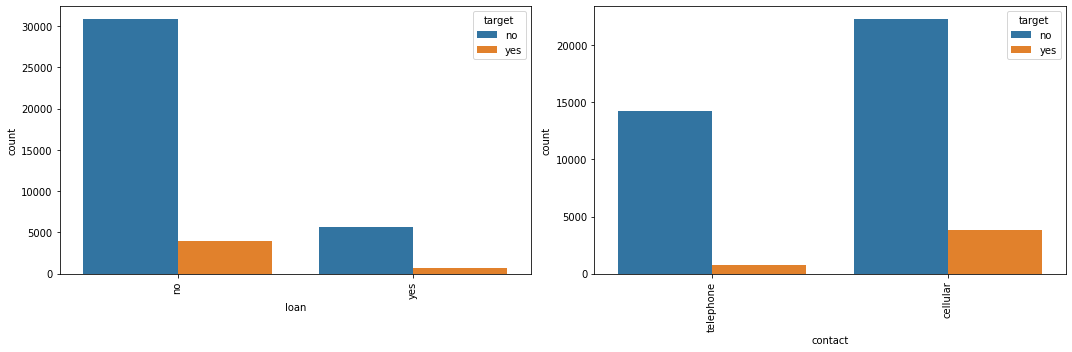

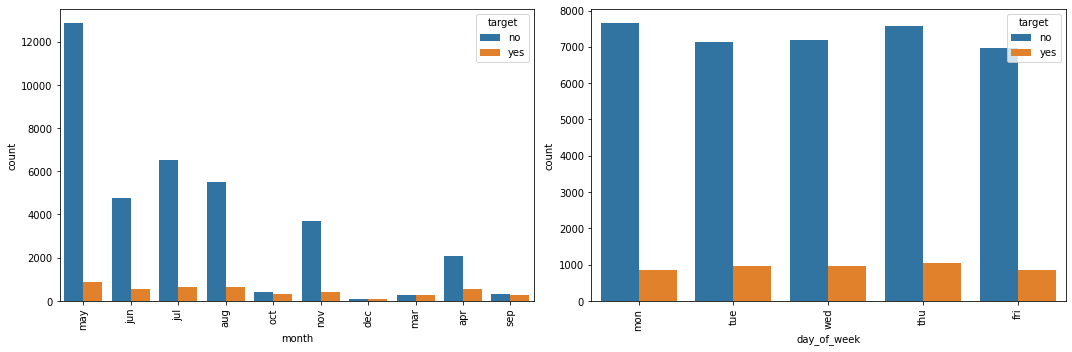

In [42]:
# Plotting relation between categorical variables and the target variable:
def target_cat(df,target):
    cat_columns = df.select_dtypes(exclude=np.number).columns
    for i in range(0,len(cat_columns),2):
        if len(cat_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=df[cat_columns[i]],hue=target,data=df)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(df[cat_columns[i+1]],hue=target,data=df)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


target_cat(df,df['target'])

Also based on the barplots above, it is clear that the target variable is imbalanced. What we can say for sure is that there is no dependency between the target and the day of the week, as for each day the target 'no' and 'yes' has very similar counts. 

In [43]:
# Correlation between numerical variables:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000528,0.008391,0.053422,0.034998,0.110540,0.063417,0.043307
duration,-0.000528,1.000000,-0.075857,-0.050240,0.001838,-0.013254,-0.057935,-0.074056
campaign,0.008391,-0.075857,1.000000,0.145173,0.109021,0.004847,0.126417,0.140784
emp.var.rate,0.053422,-0.050240,0.145173,1.000000,0.765664,0.399773,0.975607,0.931650
cons.price.idx,0.034998,0.001838,0.109021,0.765664,1.000000,0.282419,0.689118,0.566752
cons.conf.idx,0.110540,-0.013254,0.004847,0.399773,0.282419,1.000000,0.443918,0.252494
euribor3m,0.063417,-0.057935,0.126417,0.975607,0.689118,0.443918,1.000000,0.958584
nr.employed,0.043307,-0.074056,0.140784,0.931650,0.566752,0.252494,0.958584,1.000000


Correlation:
97.6% between euribor3m and emp.var.rate
96% between euribor3m and nr.employed
93% between nr.employed and emp.var.rate
One or more of these features will need to be eliminated.
Between other variables the level of multicollinearity is low.

In [45]:
# For the purpose of further modelling emp.var.rate will be deleted, but nr.employed will be kept.
del df['emp.var.rate']

In [46]:
# Standarization of numerical data:
idx_numeric=[0,9,10,11,12,13,14]
scaler = MinMaxScaler()
df[df.columns[idx_numeric]] = scaler.fit_transform(df[df.columns[idx_numeric]])

In [47]:
# Effect of the standarization:
display(df)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,1.000000,housemaid,married,basic.4y,no,no,telephone,may,mon,0.436893,0.00,0.731164,0.972727,0.974322,0.823837,no
1,1.000000,services,married,high.school,no,no,telephone,may,mon,0.219417,0.00,0.731164,0.972727,0.974322,0.823837,no
2,0.379310,services,married,high.school,yes,no,telephone,may,mon,0.368932,0.00,0.731164,0.972727,0.974322,0.823837,no
3,0.482759,admin.,married,basic.6y,no,no,telephone,may,mon,0.223301,0.00,0.731164,0.972727,0.974322,0.823837,no
4,1.000000,services,married,high.school,no,yes,telephone,may,mon,0.526214,0.00,0.731164,0.972727,0.974322,0.823837,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.000000,retired,married,professional.course,yes,no,cellular,nov,fri,0.578641,0.00,1.000000,0.000000,0.055436,0.000000,yes
41184,0.689655,blue-collar,married,professional.course,no,no,cellular,nov,fri,0.673786,0.00,1.000000,0.000000,0.055436,0.000000,no
41185,1.000000,retired,married,university.degree,yes,no,cellular,nov,fri,0.297087,0.25,1.000000,0.000000,0.055436,0.000000,no
41186,0.620690,technician,married,professional.course,no,no,cellular,nov,fri,0.788350,0.00,1.000000,0.000000,0.055436,0.000000,yes


In [48]:
# Handling ordinal variables: housing and loan
df['housing'] = df['housing'].map({'yes': 1,'no': 0})
df['loan'] = df['loan'].map({'yes': 1,'no': 0})

In [49]:
# Handling nominal variables - one hot encoding: job, marital, education, contact, month, day_of_week
# Encoding the target variable:
nominal_variables = ['job','marital','education','contact','month','day_of_week']
df_final = pd.get_dummies(df,columns=nominal_variables)
df_final['target']=df_final['target'].map({'yes': 1,'no': 0})

In [50]:
display(df_final)

,age,housing,loan,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.000000,0,0,0.436893,0.00,0.731164,0.972727,0.974322,0.823837,0,...,0,1,0,0,0,0,1,0,0,0
1,1.000000,0,0,0.219417,0.00,0.731164,0.972727,0.974322,0.823837,0,...,0,1,0,0,0,0,1,0,0,0
2,0.379310,1,0,0.368932,0.00,0.731164,0.972727,0.974322,0.823837,0,...,0,1,0,0,0,0,1,0,0,0
3,0.482759,0,0,0.223301,0.00,0.731164,0.972727,0.974322,0.823837,0,...,0,1,0,0,0,0,1,0,0,0
4,1.000000,0,1,0.526214,0.00,0.731164,0.972727,0.974322,0.823837,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.000000,1,0,0.578641,0.00,1.000000,0.000000,0.055436,0.000000,1,...,0,0,1,0,0,1,0,0,0,0
41184,0.689655,0,0,0.673786,0.00,1.000000,0.000000,0.055436,0.000000,0,...,0,0,1,0,0,1,0,0,0,0
41185,1.000000,1,0,0.297087,0.25,1.000000,0.000000,0.055436,0.000000,0,...,0,0,1,0,0,1,0,0,0,0
41186,0.620690,0,0,0.788350,0.00,1.000000,0.000000,0.055436,0.000000,1,...,0,0,1,0,0,1,0,0,0,0


Clustering

In [109]:
# Scaling the data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

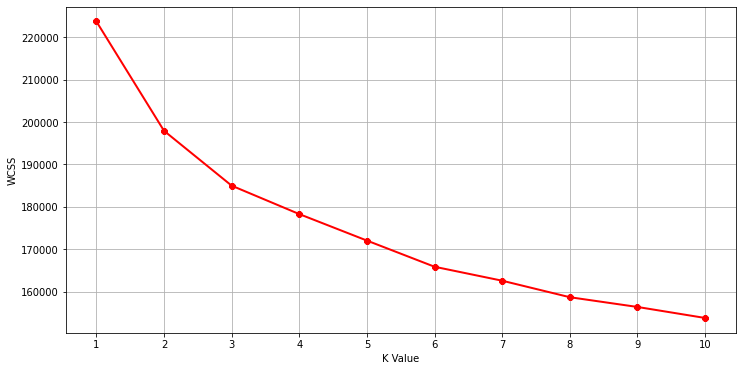

In [54]:
# K-means clustering:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_final.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Based on the elbow method (allowing to select the optimal number of clusters) k=5 was chosen.

In [55]:
kmeans = KMeans(5)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [56]:
kmeans.cluster_centers_.shape

(5, 48)

In [57]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_final.columns])
cluster_centers

,age,housing,loan,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.145238,0.077726,0.003091,-0.153708,-0.039109,-0.515708,0.607298,0.423613,0.517868,-0.205133,...,-0.115907,-0.708640,0.986300,-0.133197,-0.118462,-0.040657,-0.034633,0.032877,0.015641,0.026087
1,0.052439,0.062064,-0.025677,0.320832,-0.300076,-0.524946,0.454796,-1.519315,-1.889820,1.656191,...,1.148720,-0.623286,-0.086585,1.275553,1.174042,-0.012402,-0.031618,-0.000861,0.073697,-0.028283
2,0.061777,-0.143043,-0.021461,-0.012154,0.069922,1.032264,0.602290,0.703179,0.495925,-0.243825,...,-0.115907,0.624884,-0.316066,-0.119610,-0.118462,0.077245,-0.026632,-0.074930,0.006701,0.020855
3,-0.089130,-0.006389,0.034096,0.025158,0.210878,0.599052,-0.465014,0.724762,0.808223,-0.167724,...,-0.115907,-0.708640,-0.332532,-0.133197,-0.118462,-0.131124,0.019533,0.053986,0.039552,0.014708
4,-0.193177,0.096148,0.011373,0.023126,-0.090939,-1.134574,-1.317122,-1.339633,-1.056250,-0.019432,...,-0.115907,0.686698,-0.306532,-0.133197,-0.118462,0.041342,0.072143,0.028694,-0.087710,-0.055920


In [111]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_final.columns])
cluster_centers

,age,housing,loan,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.630117,0.823702,0.212303,0.472879,0.395603,0.606675,0.862218,1.032829,1.006106,0.127766,...,0.013256,0.334296,0.217807,0.017432,0.013839,0.258327,0.284738,0.299976,0.276919,0.280238
1,0.621046,0.819808,0.208524,0.518187,0.365148,0.605783,0.842244,0.699117,0.749661,0.313830,...,0.029798,0.353291,0.121618,0.041562,0.031478,0.262676,0.285233,0.294391,0.286082,0.271621
2,0.621958,0.768808,0.209078,0.486394,0.408327,0.756202,0.861562,1.080847,1.003769,0.123898,...,0.013256,0.631062,0.101044,0.017665,0.013839,0.276475,0.286050,0.282131,0.275508,0.279409
3,0.607206,0.802787,0.216375,0.489957,0.424777,0.714356,0.721776,1.084554,1.037032,0.131506,...,0.013256,0.334296,0.099568,0.017432,0.013839,0.244403,0.293620,0.303470,0.280693,0.278435
4,0.597034,0.828283,0.213390,0.489763,0.389555,0.546896,0.610175,0.729979,0.838445,0.146329,...,0.013256,0.644818,0.101899,0.017432,0.013839,0.270948,0.302247,0.299284,0.260606,0.267241


In [112]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [113]:
# Adding the clusters labels to the dataframe
df_cluster = pd.concat([df_final, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,age,housing,loan,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,...,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,cluster
0,1.000000,0,0,0.436893,0.0,0.731164,0.972727,0.974322,0.823837,0,...,1,0,0,0,0,1,0,0,0,2
1,1.000000,0,0,0.219417,0.0,0.731164,0.972727,0.974322,0.823837,0,...,1,0,0,0,0,1,0,0,0,2
2,0.379310,1,0,0.368932,0.0,0.731164,0.972727,0.974322,0.823837,0,...,1,0,0,0,0,1,0,0,0,2
3,0.482759,0,0,0.223301,0.0,0.731164,0.972727,0.974322,0.823837,0,...,1,0,0,0,0,1,0,0,0,2
4,1.000000,0,1,0.526214,0.0,0.731164,0.972727,0.974322,0.823837,0,...,1,0,0,0,0,1,0,0,0,2


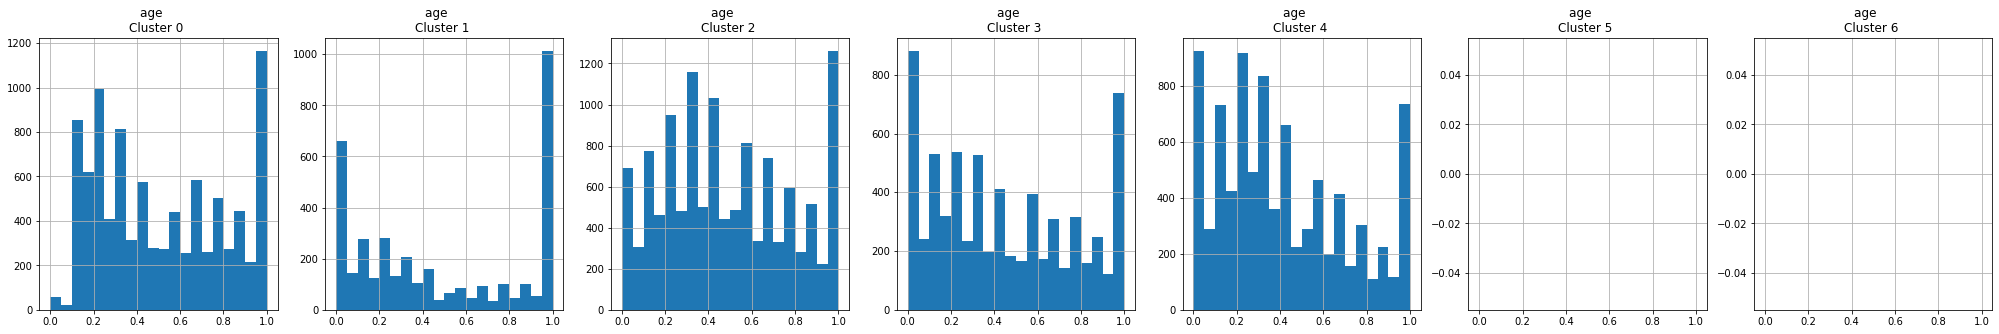

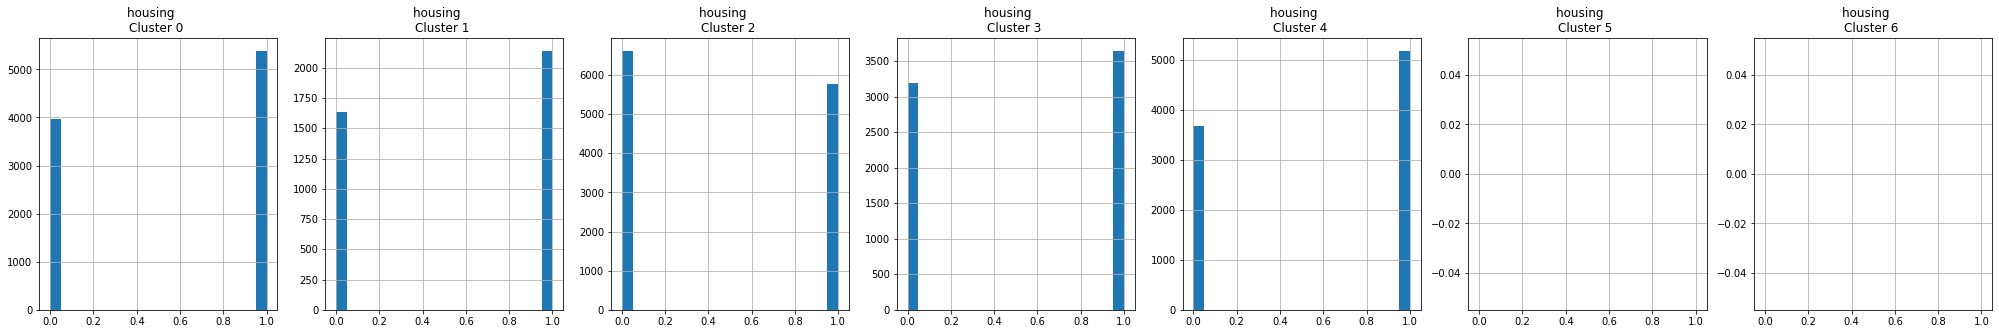

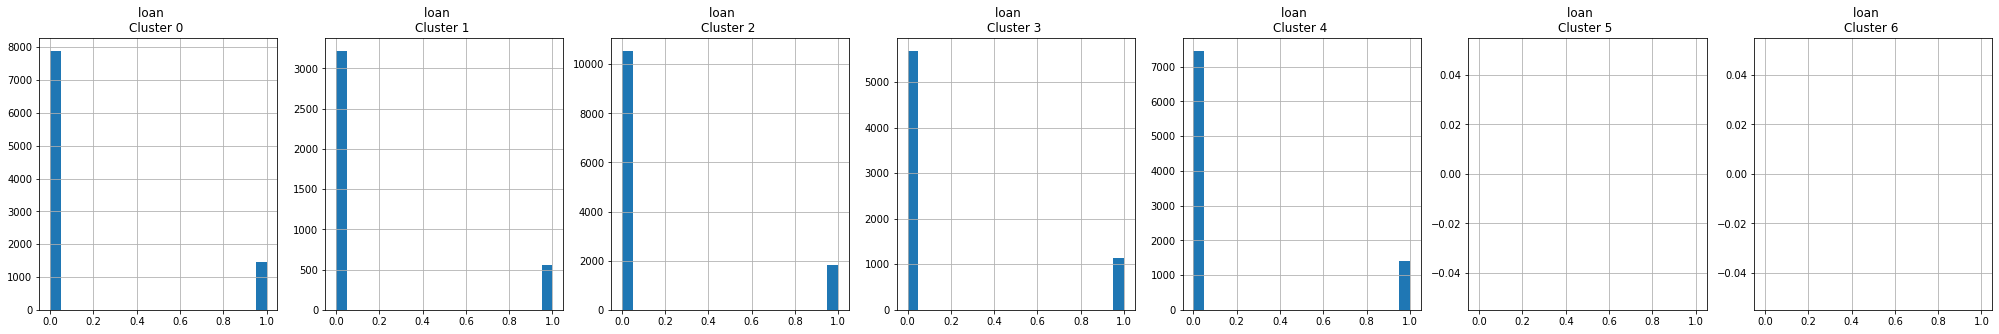

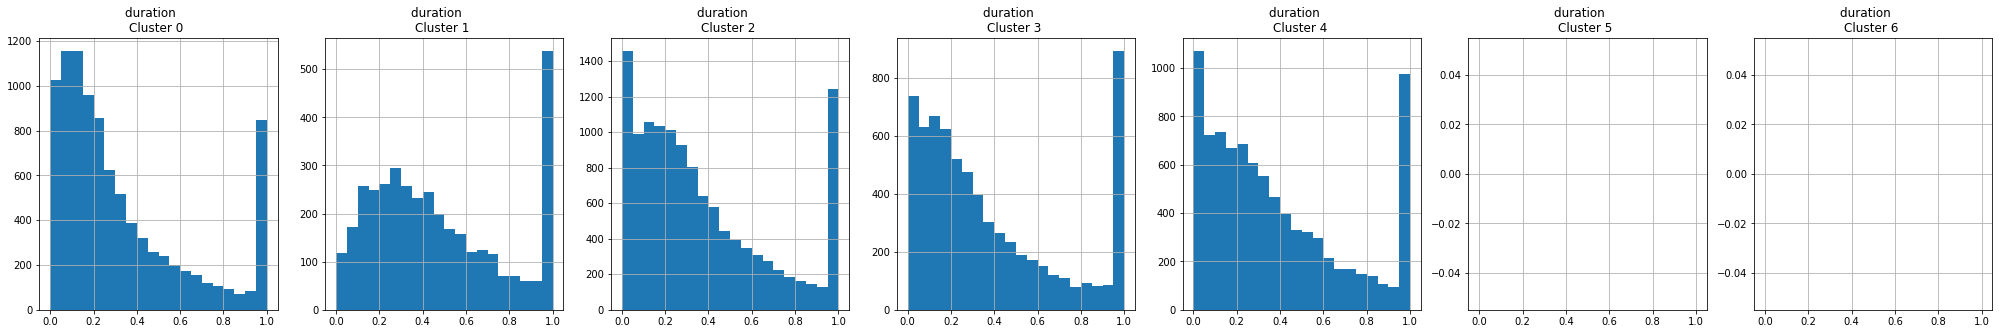

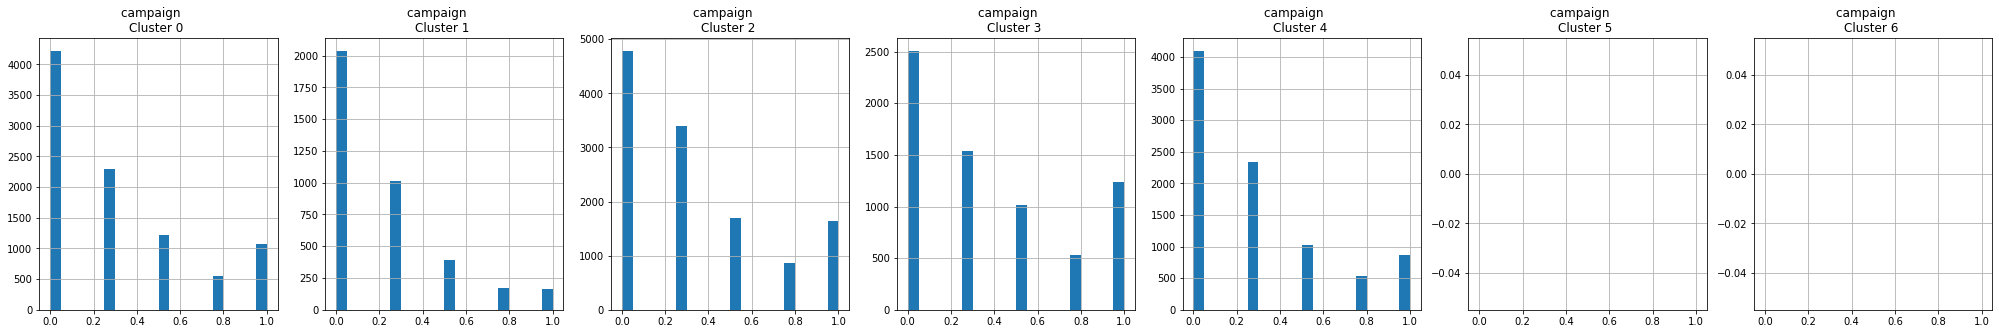

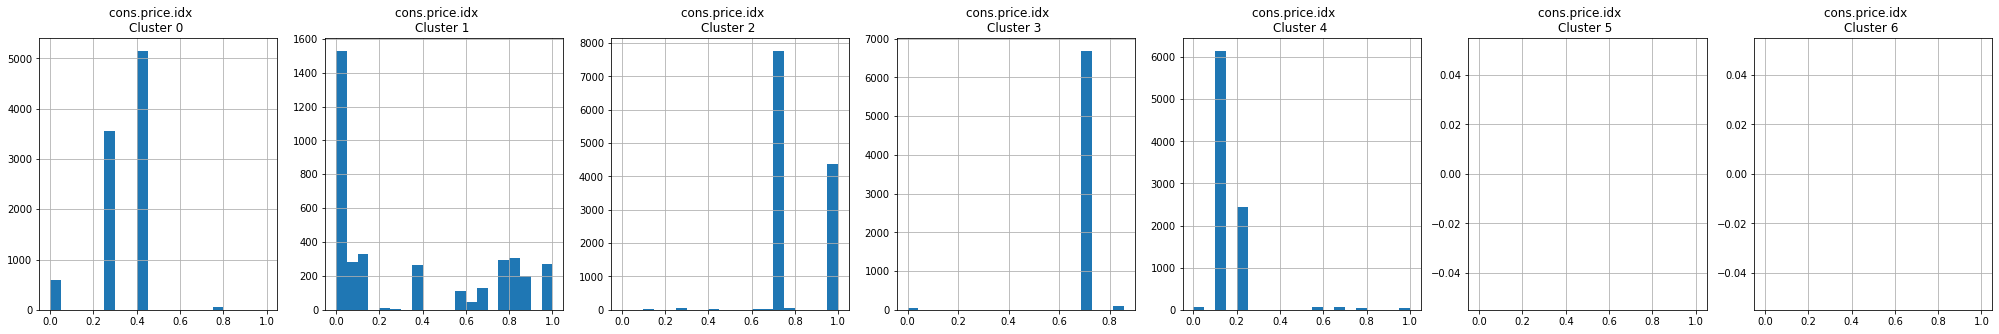

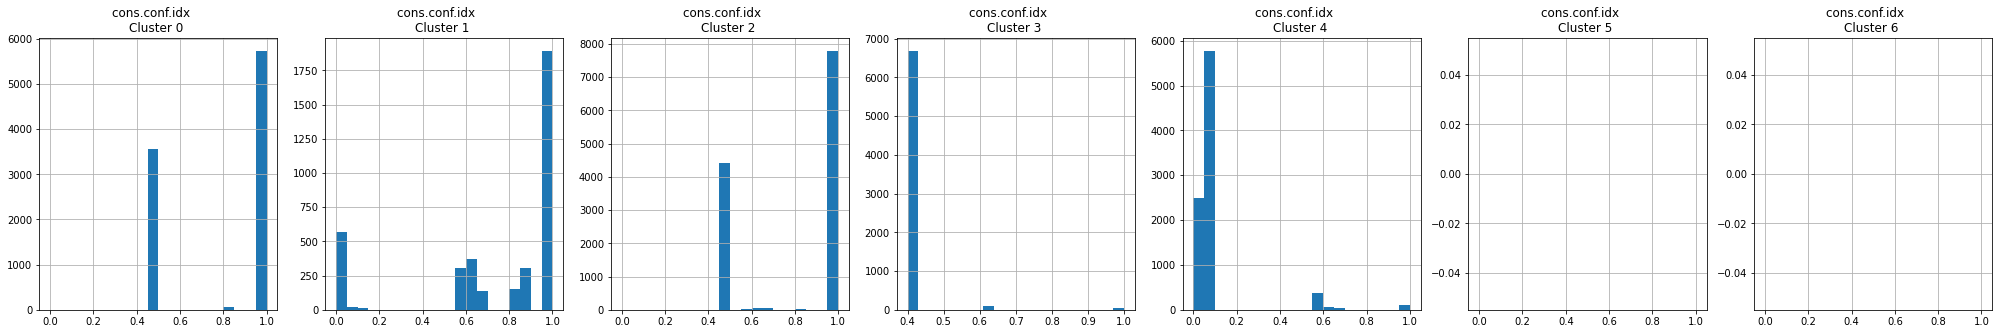

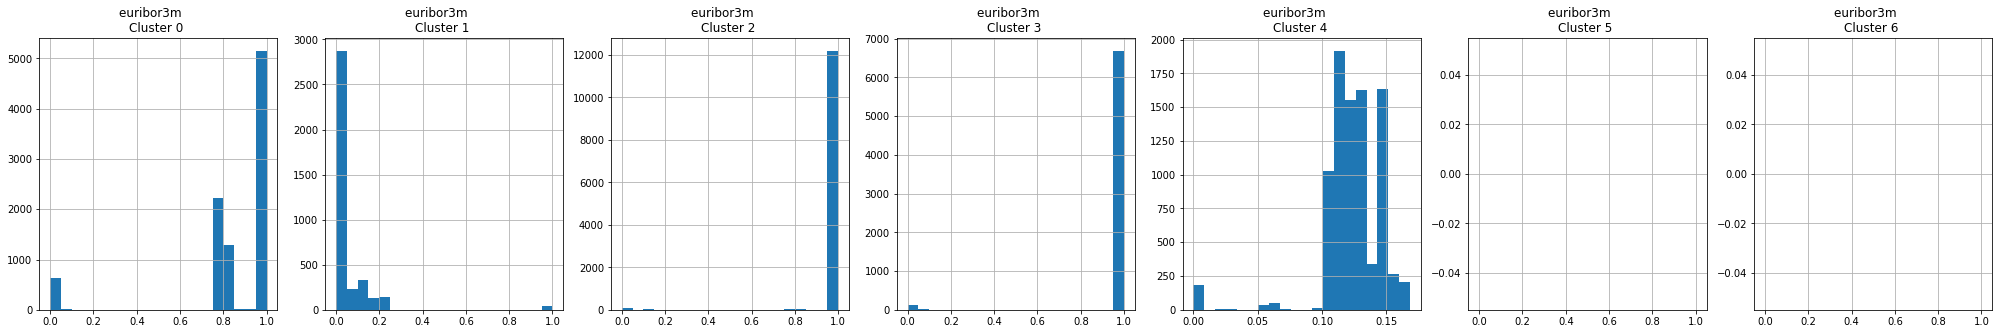

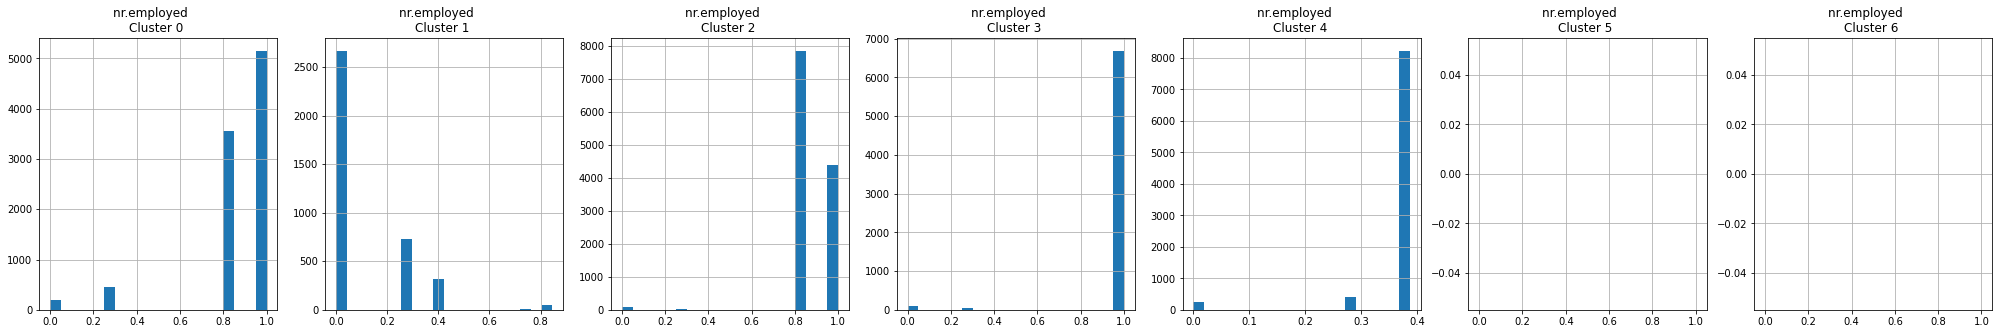

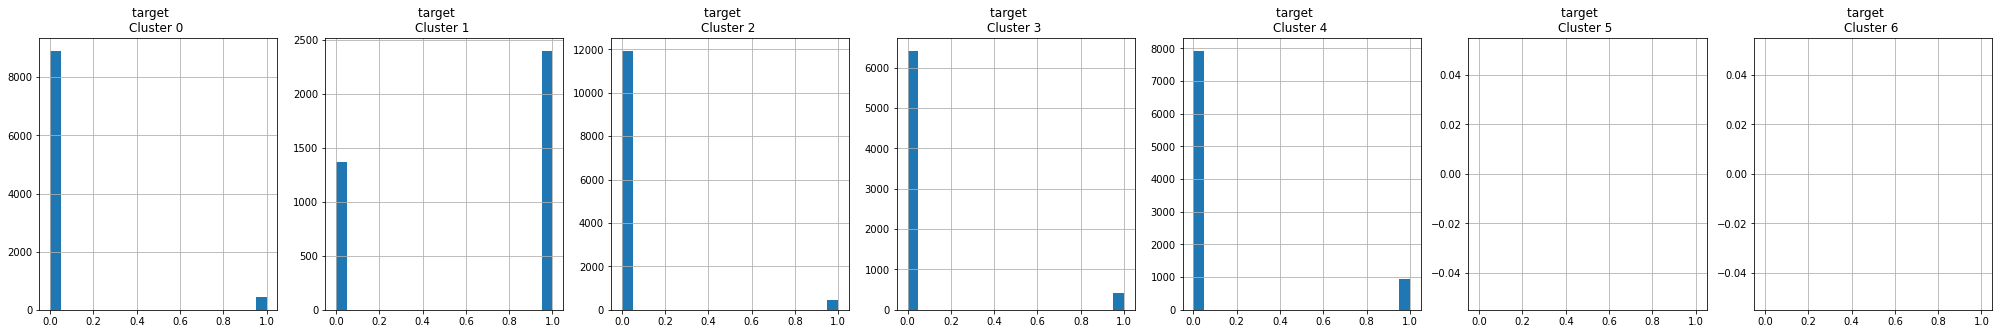

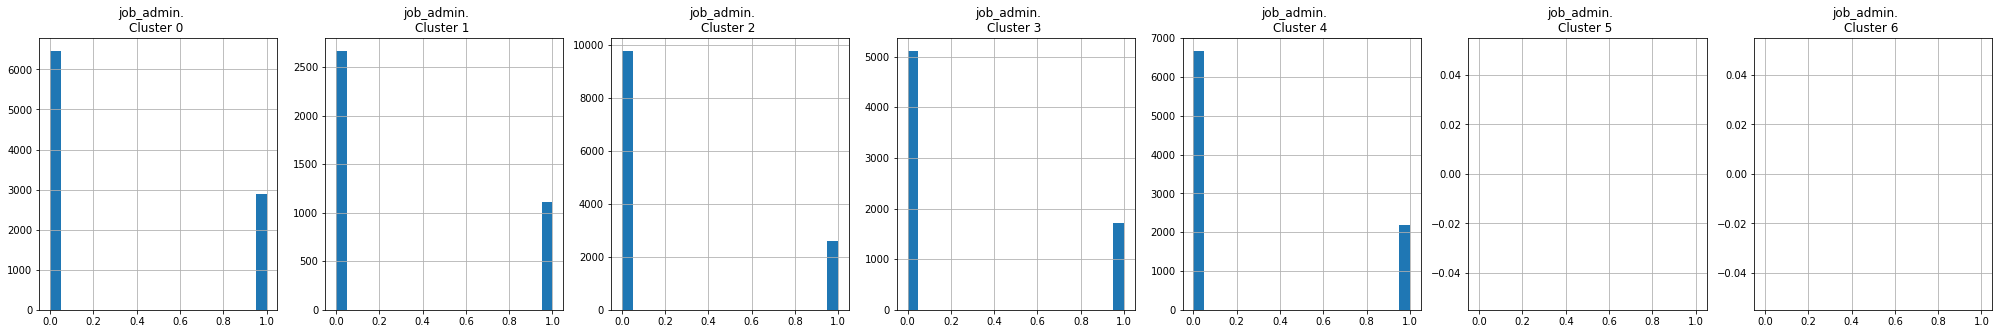

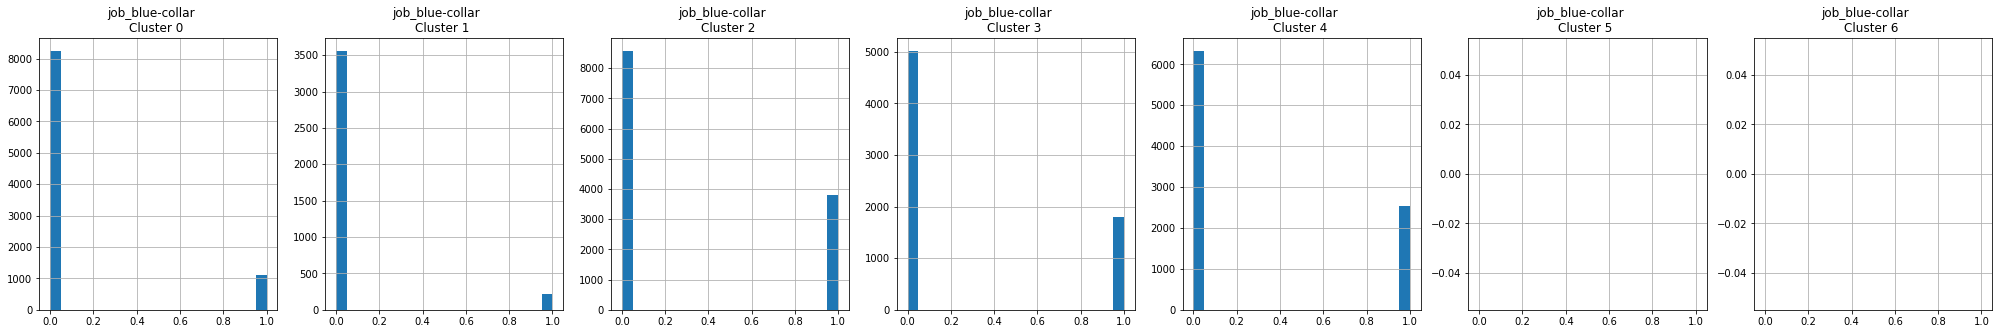

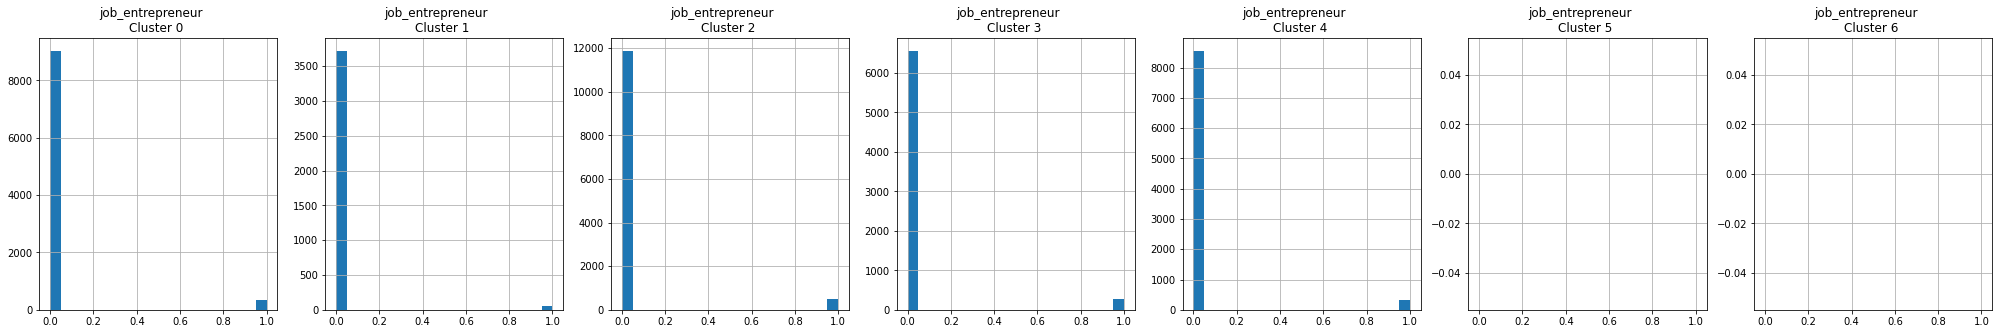

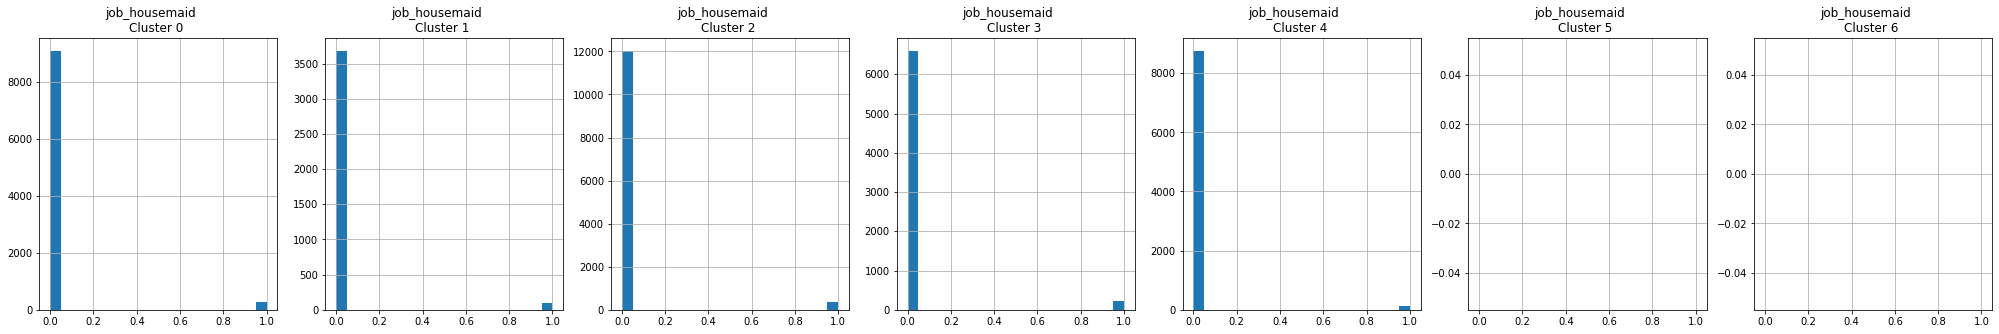

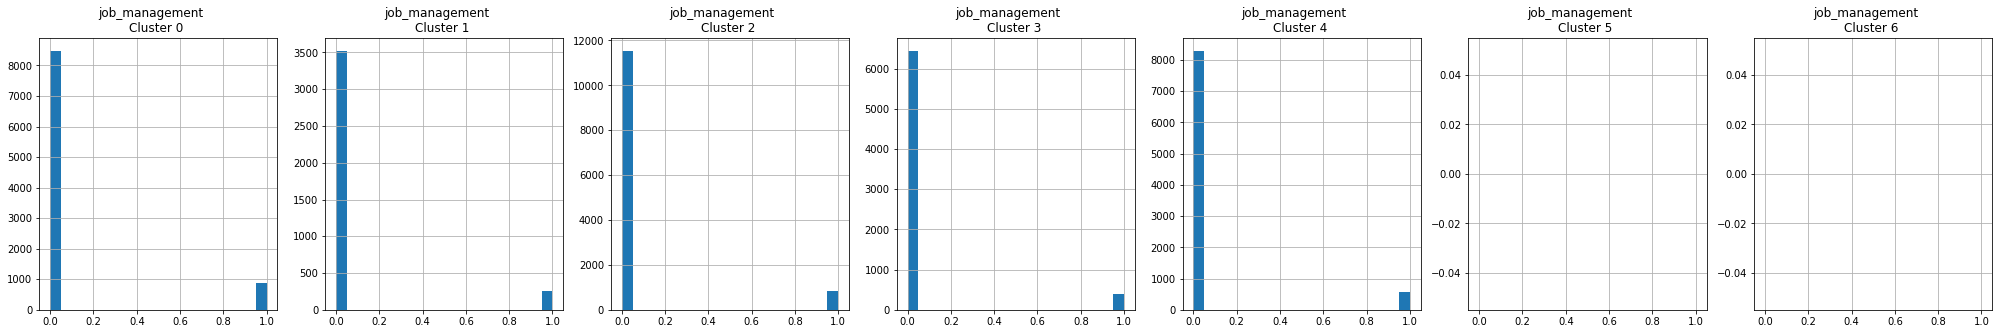

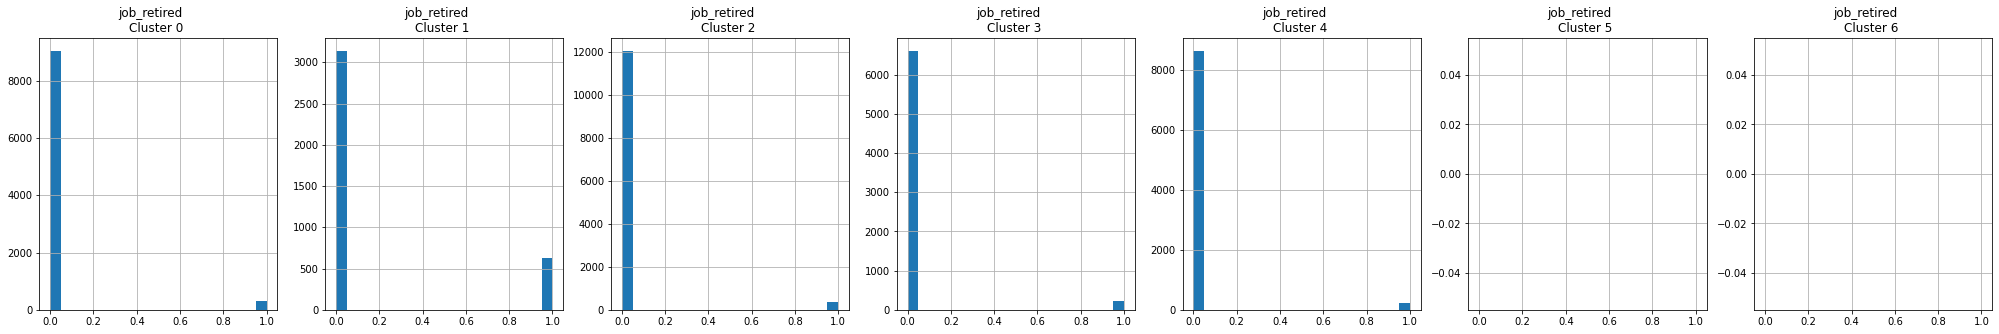

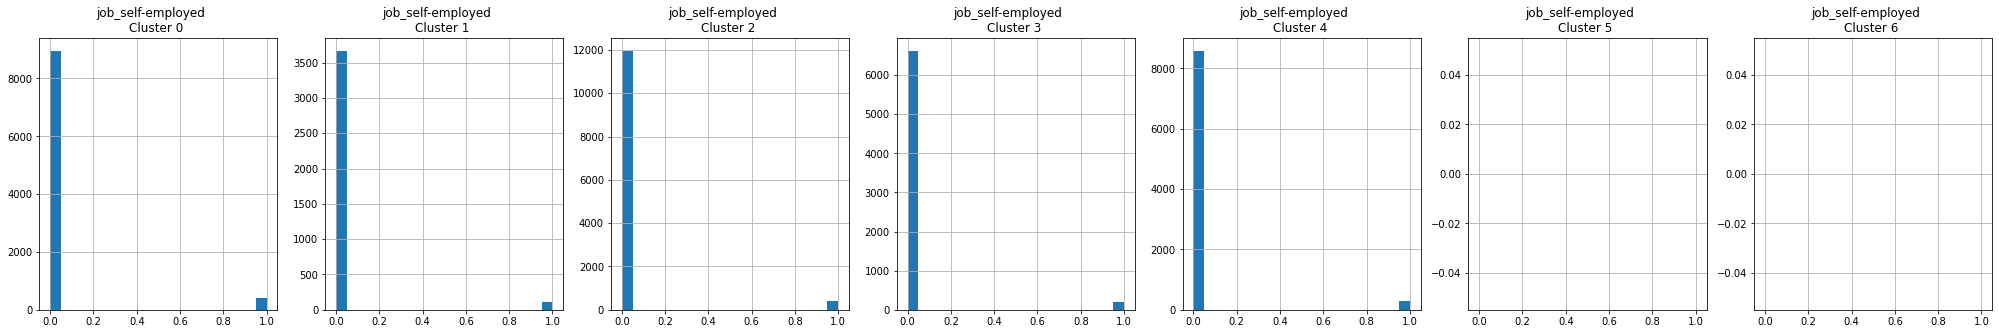

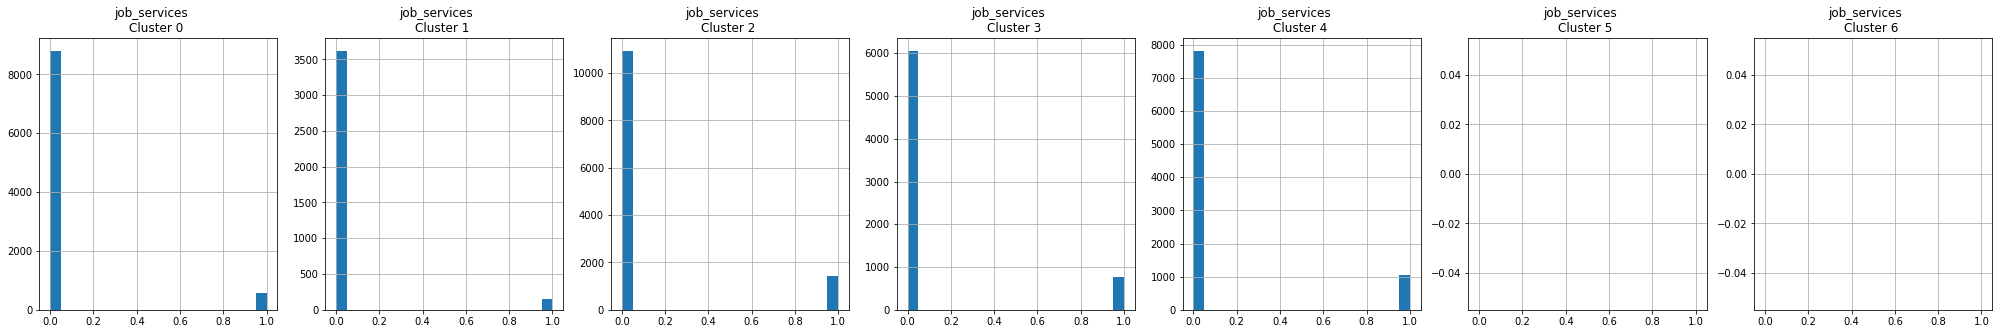

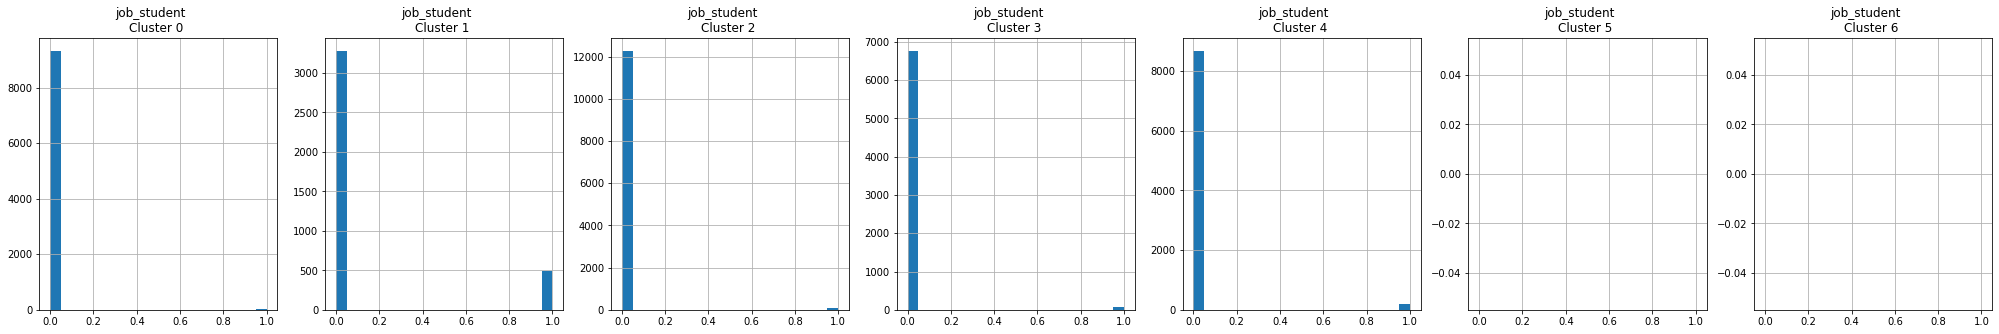

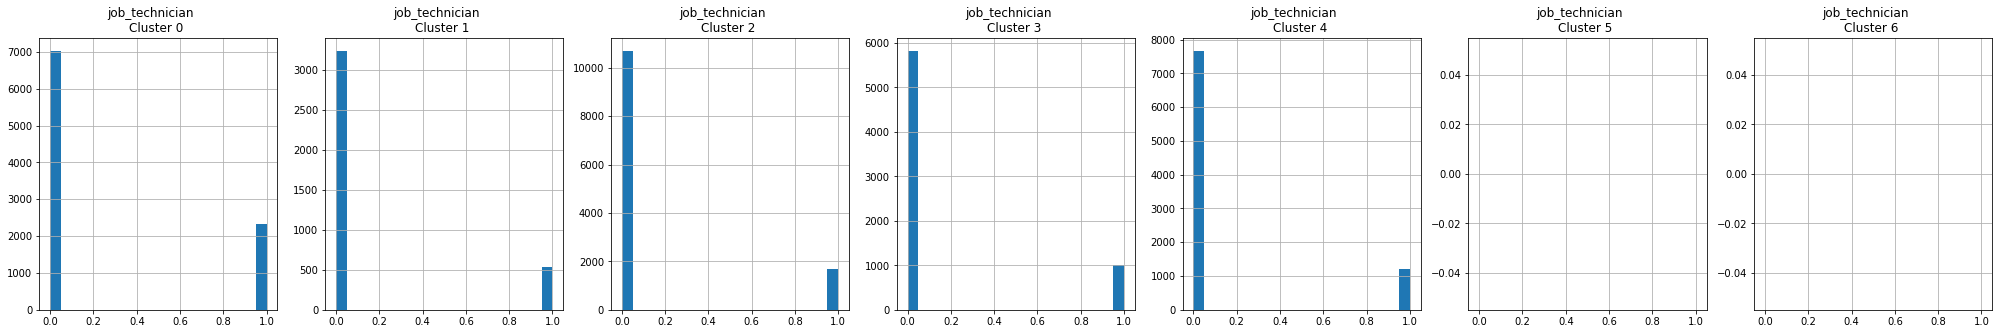

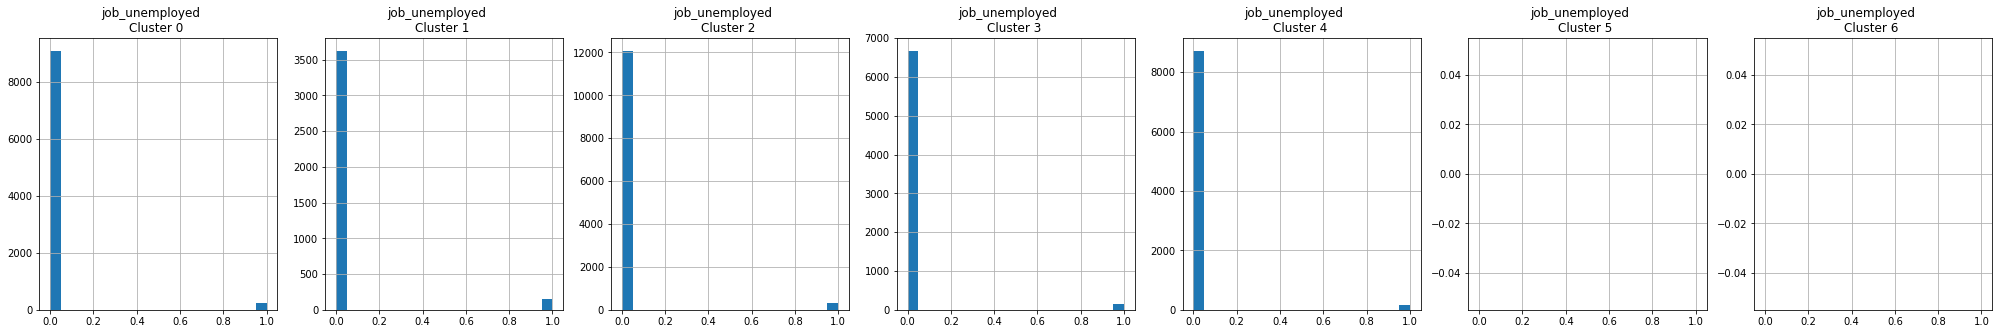

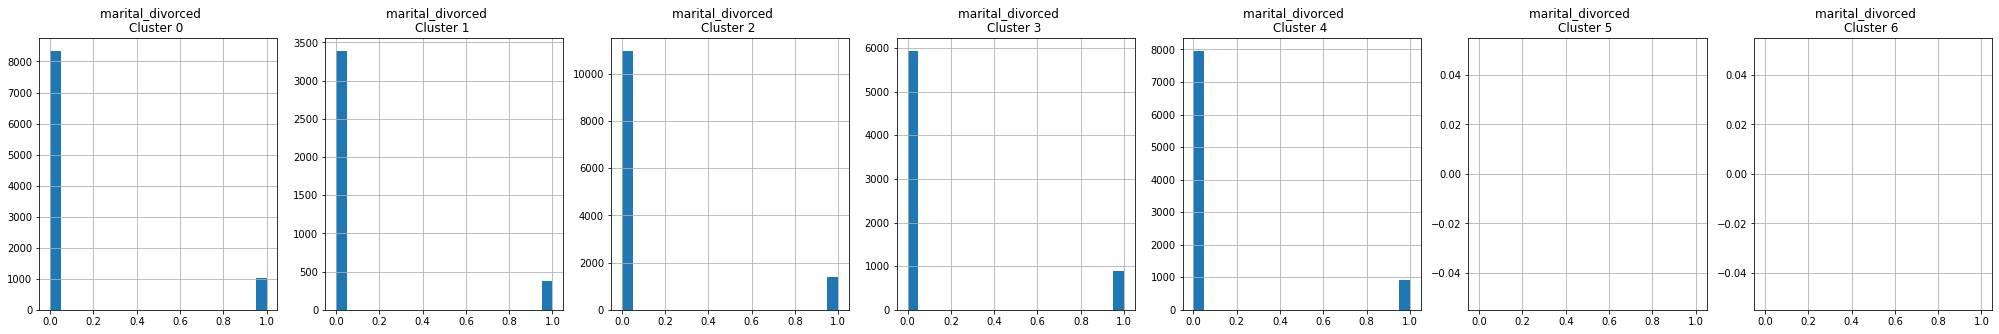

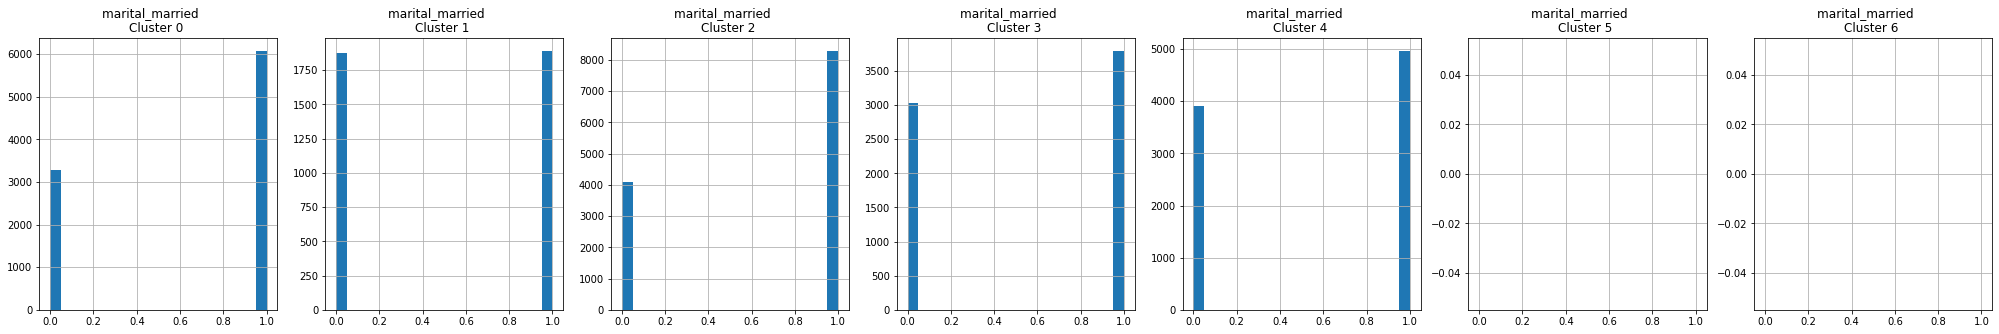

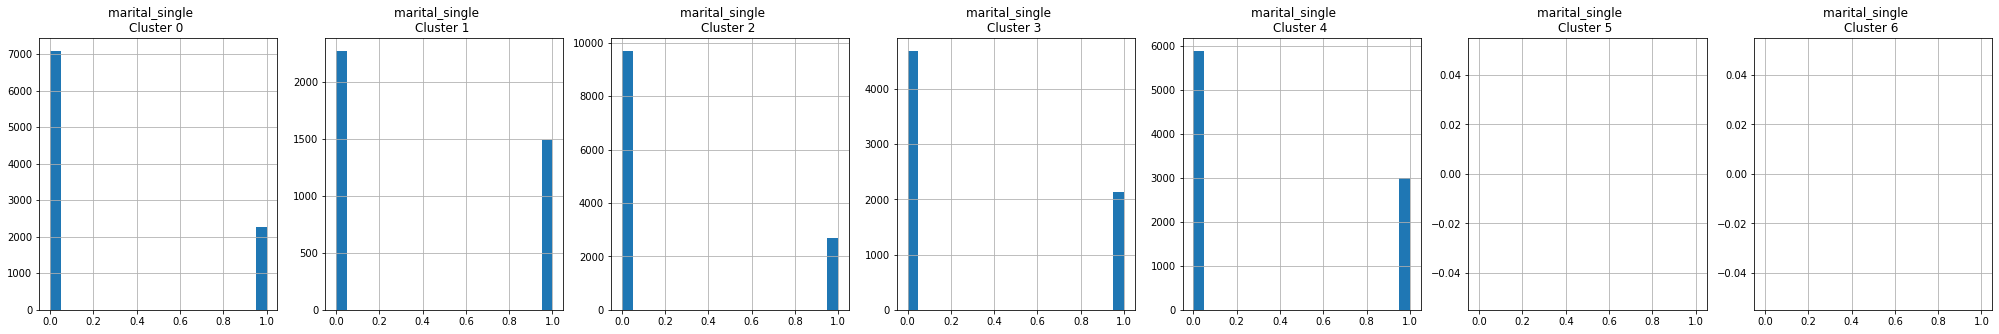

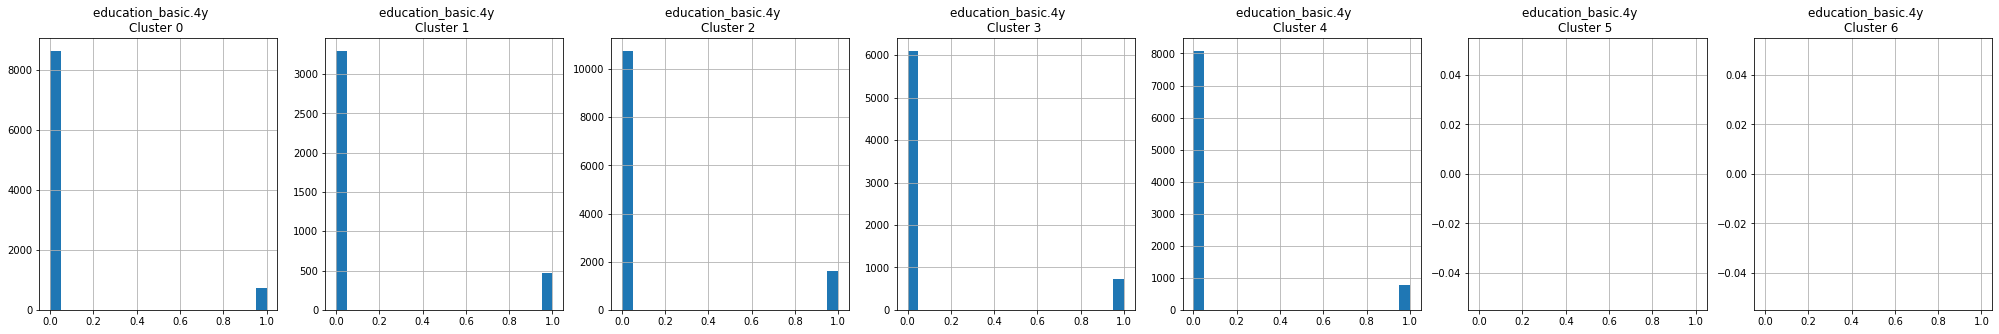

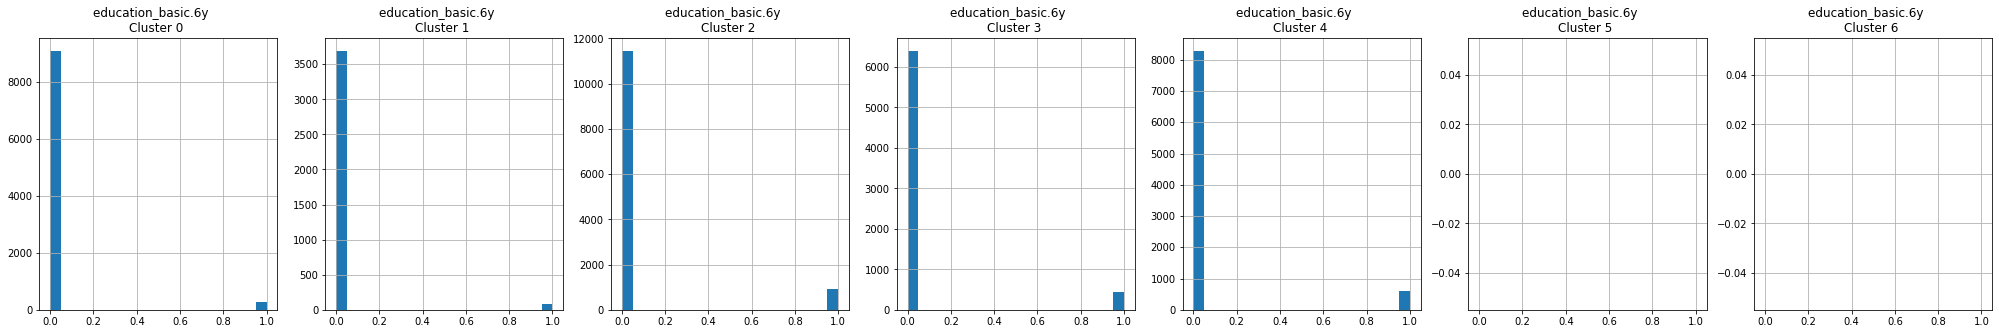

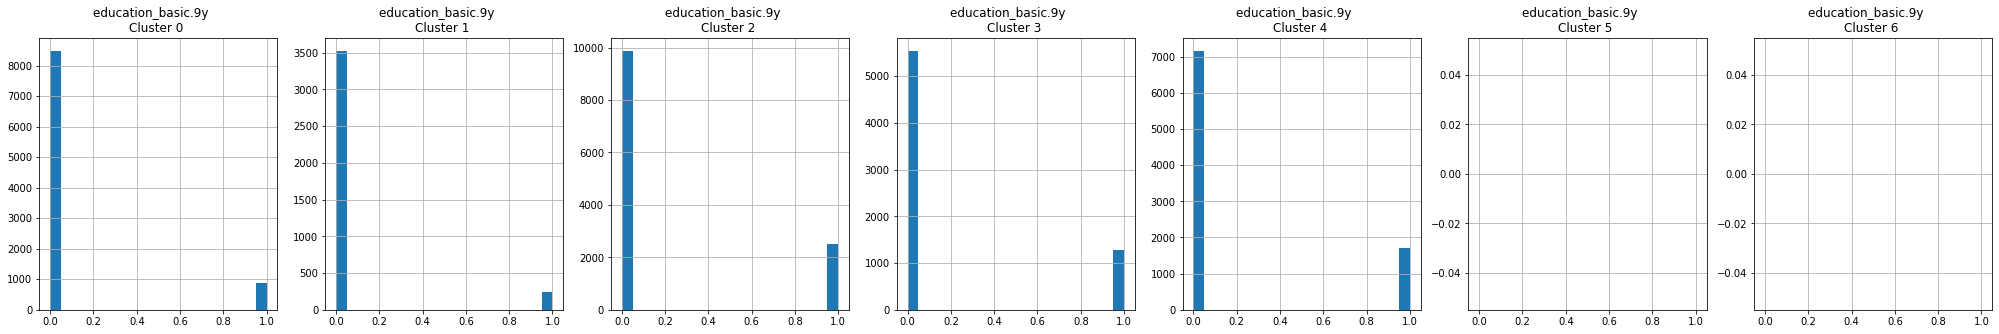

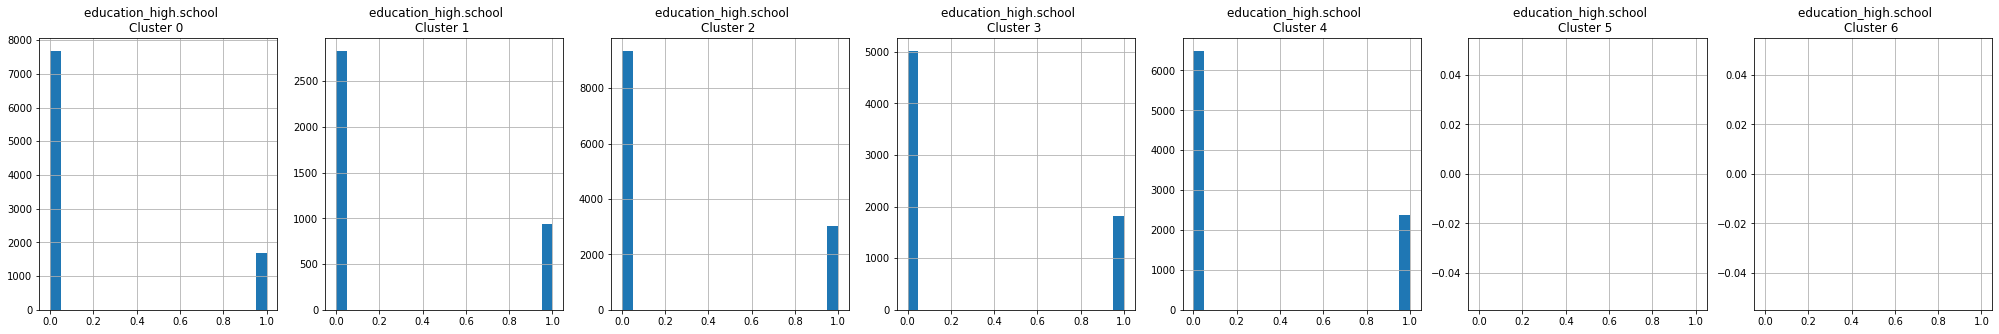

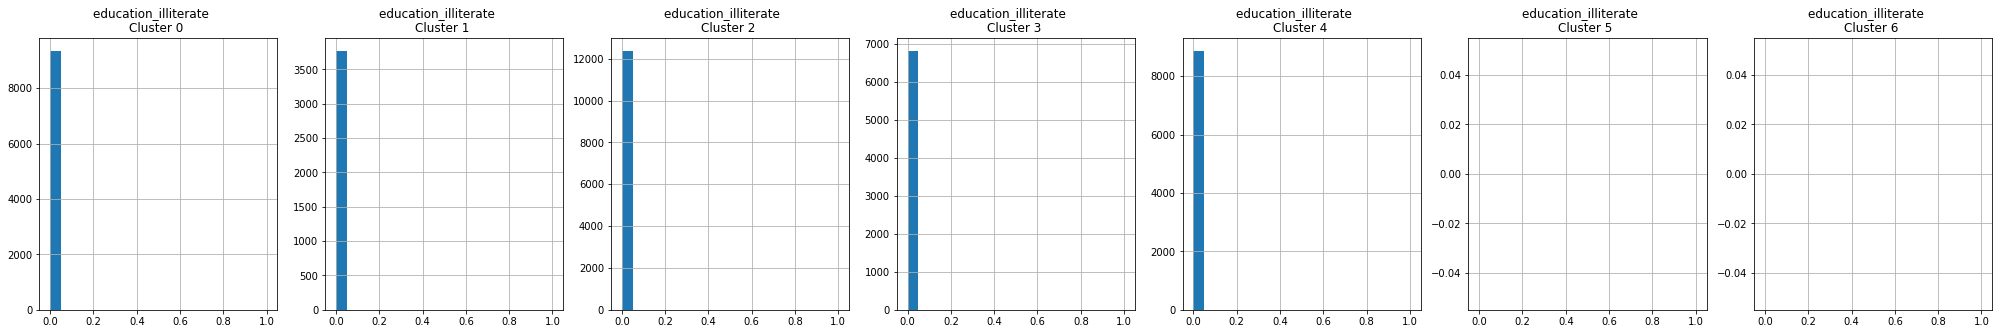

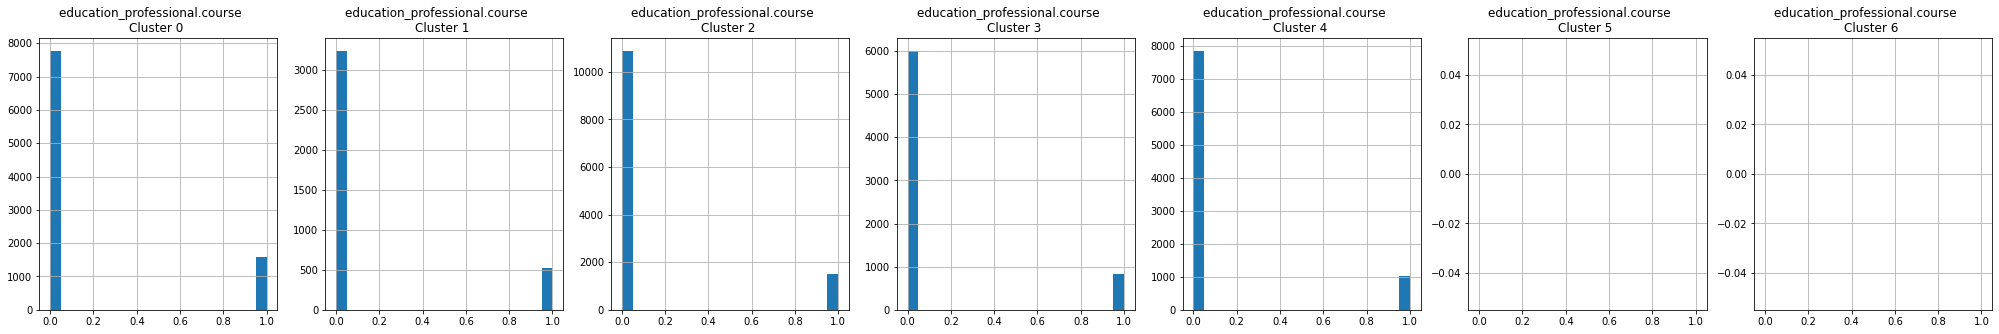

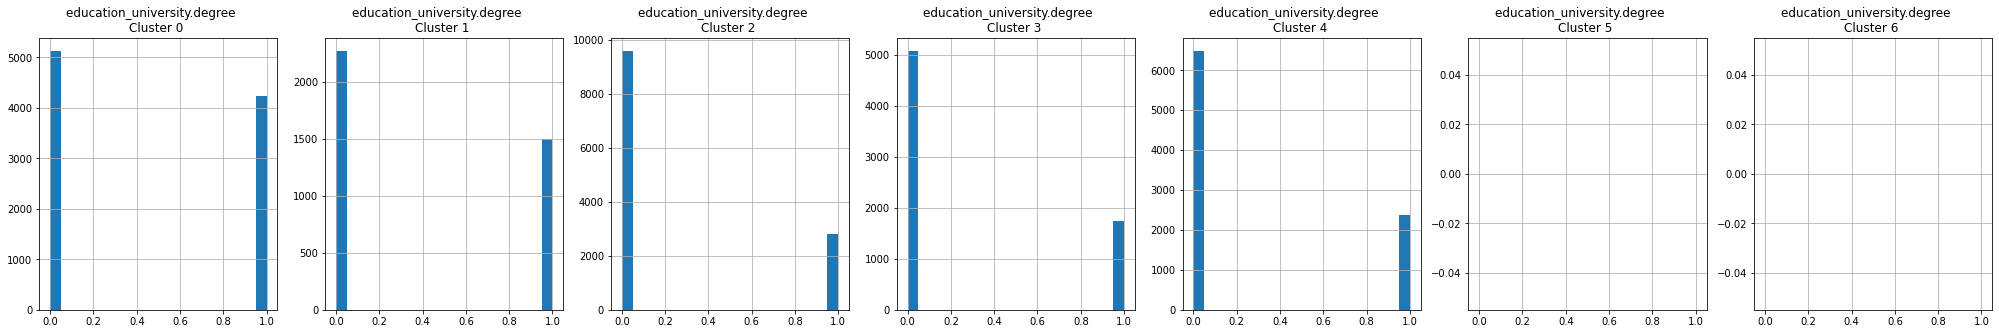

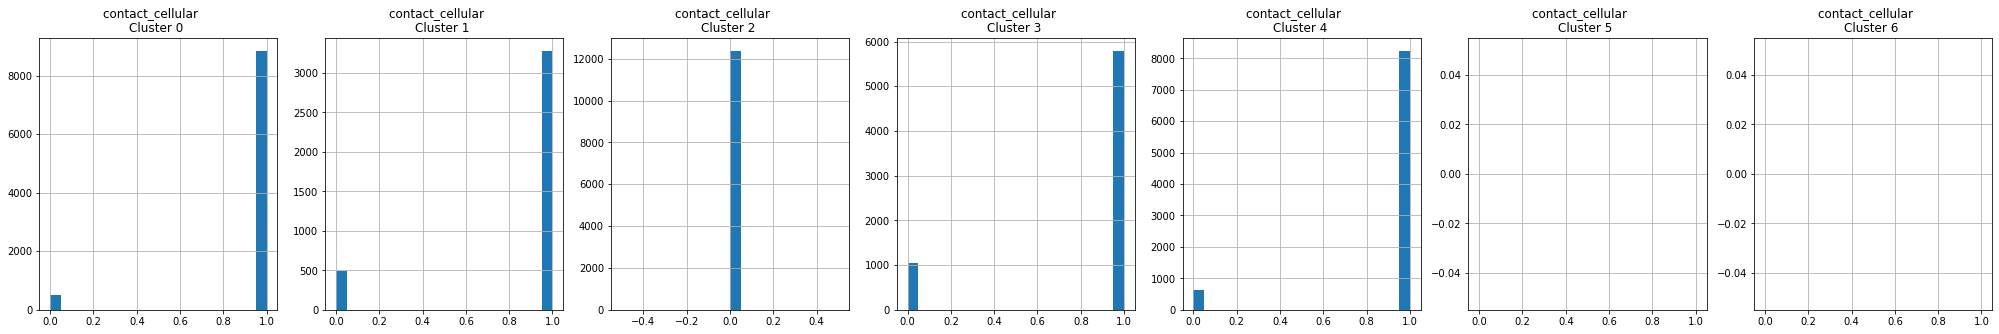

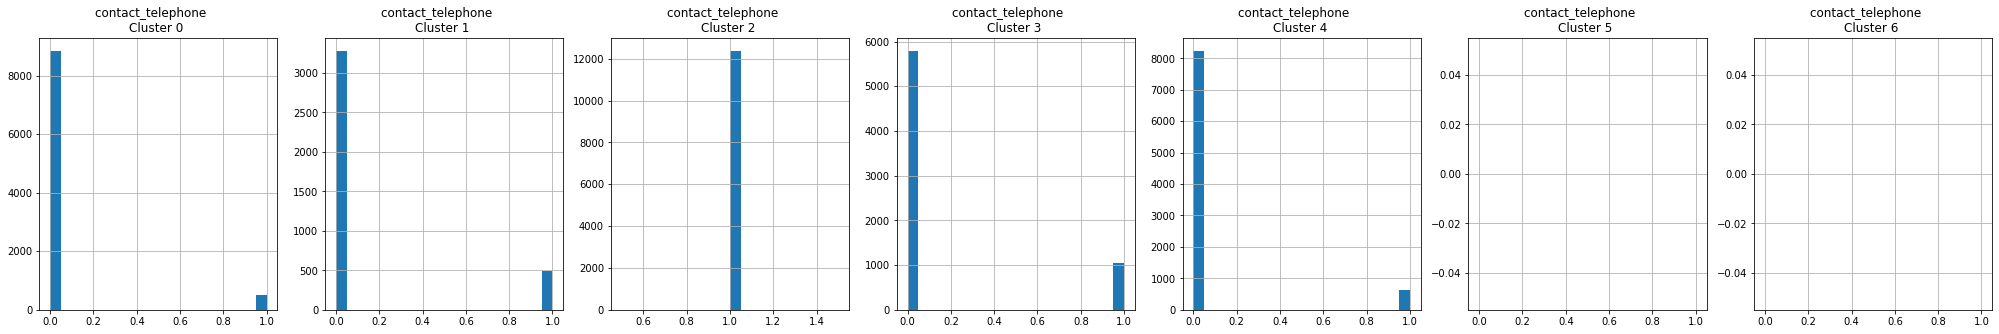

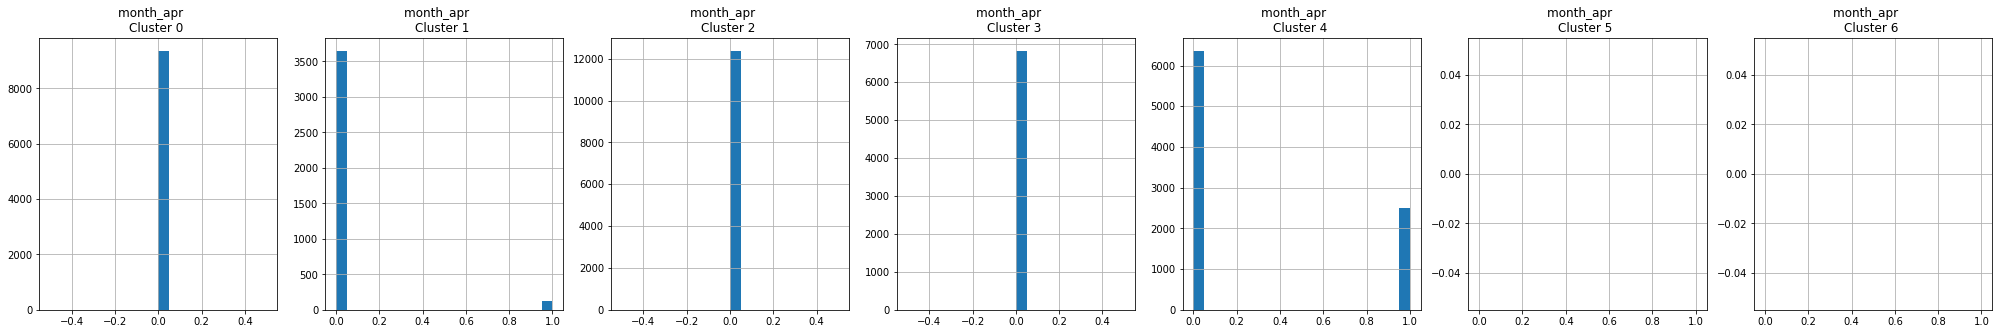

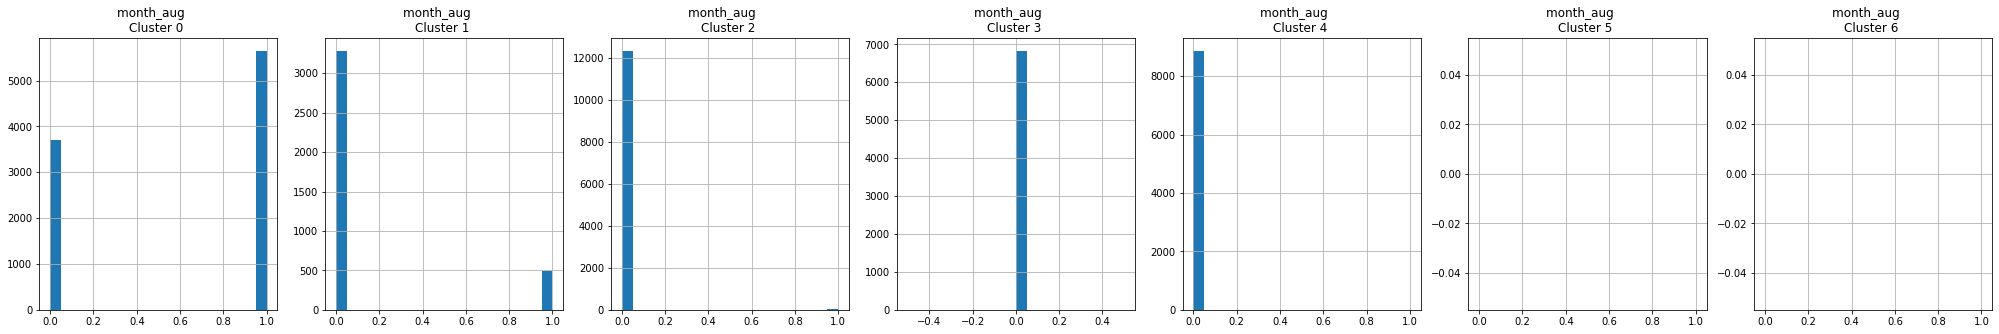

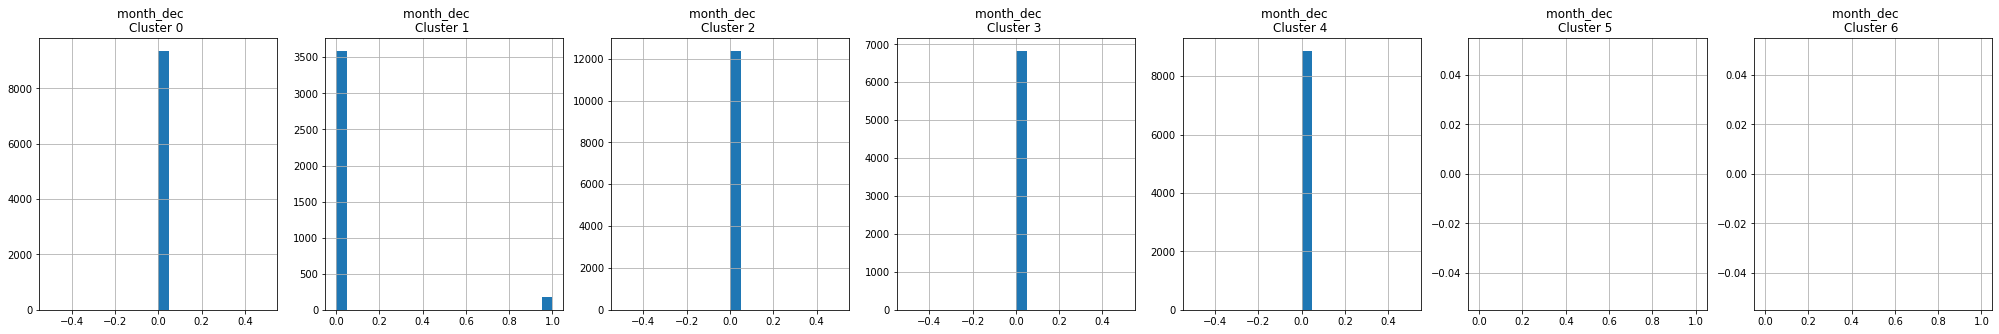

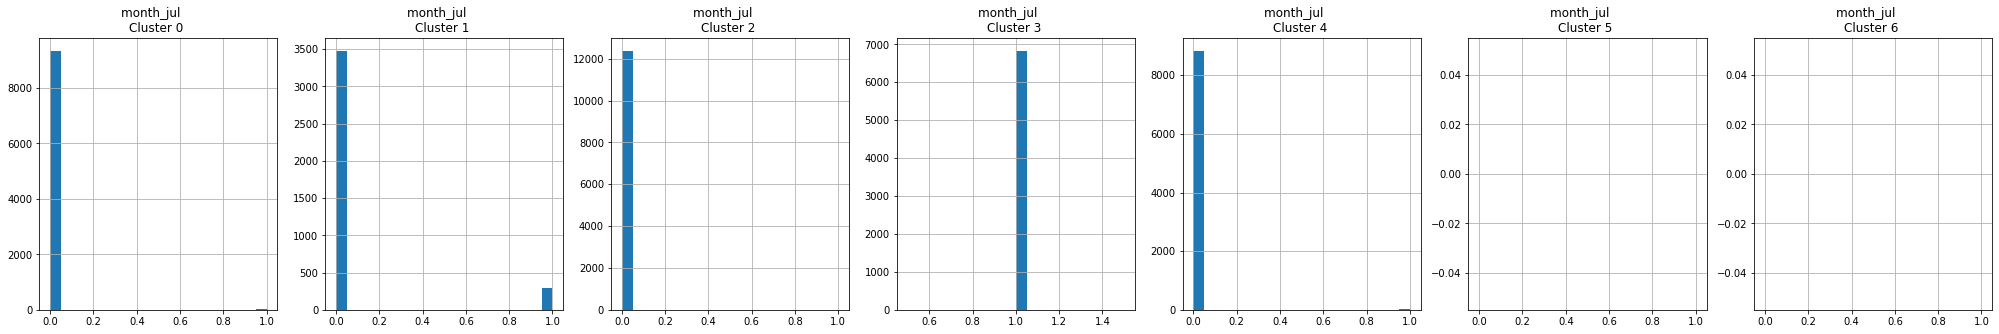

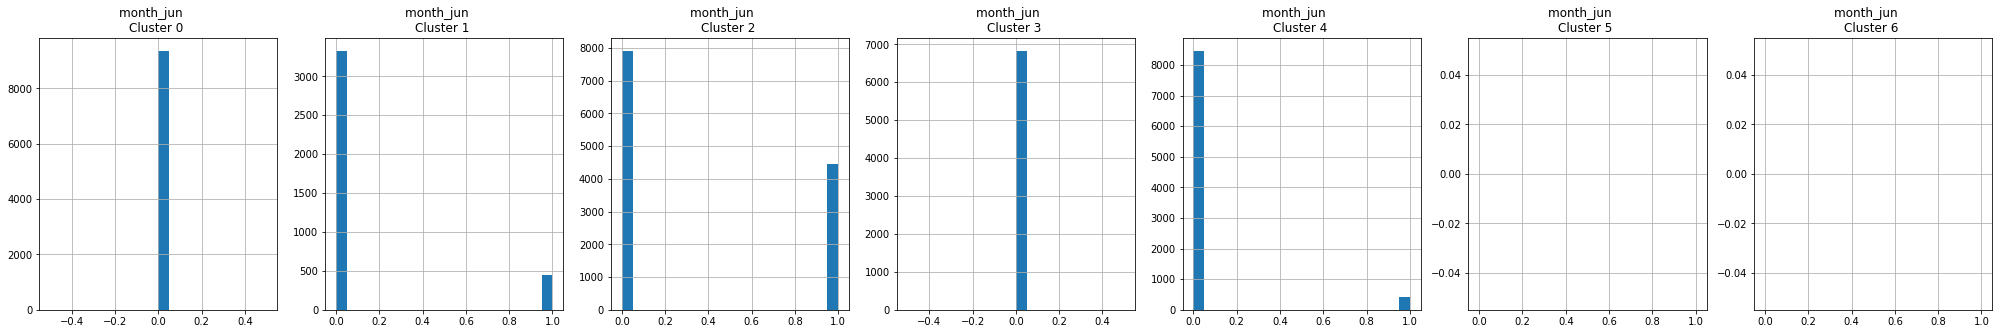

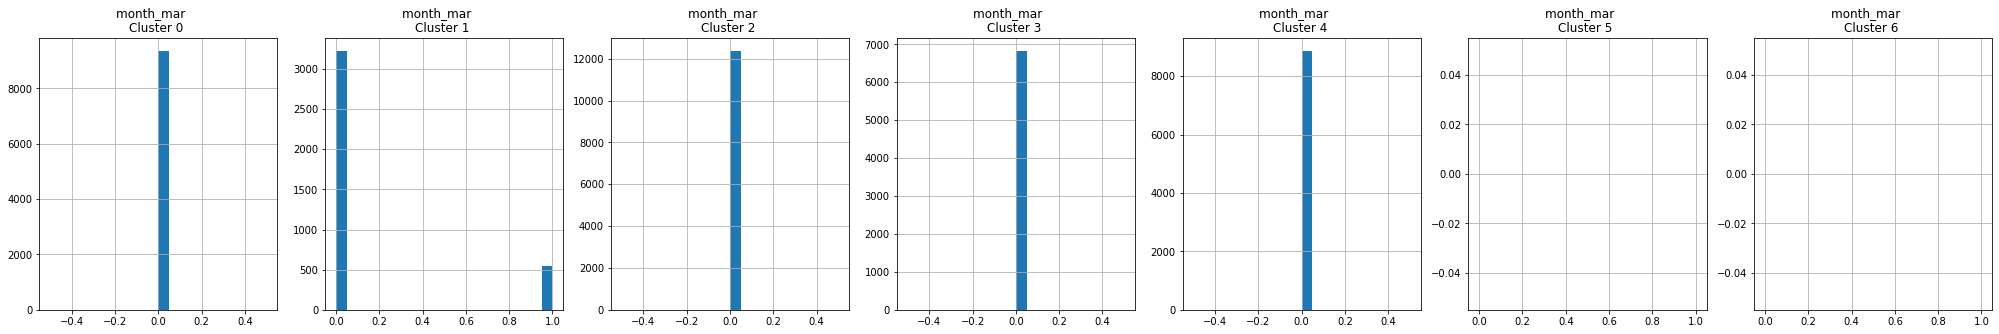

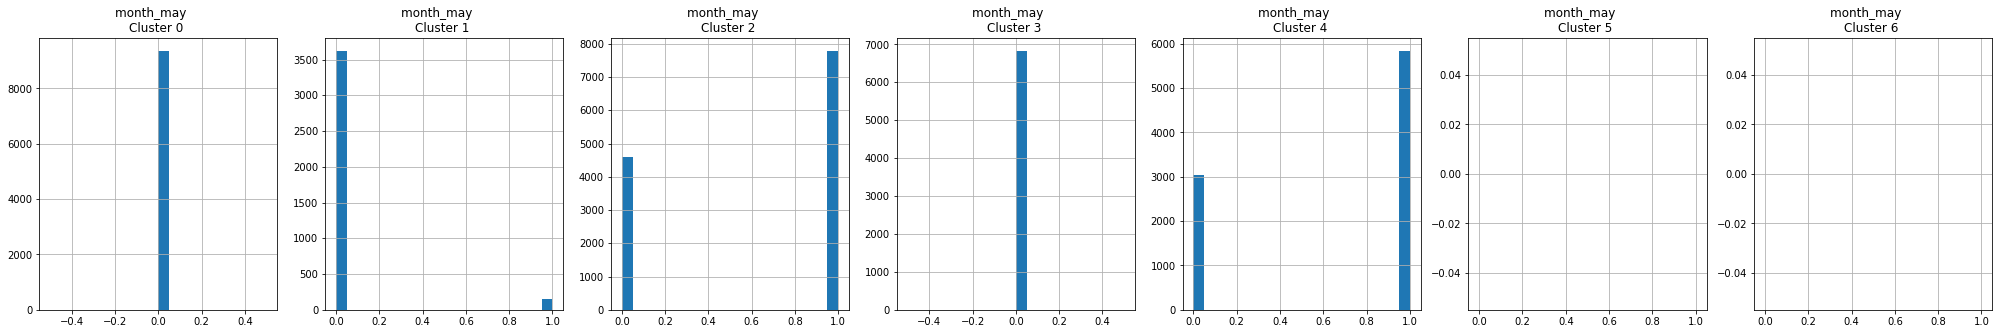

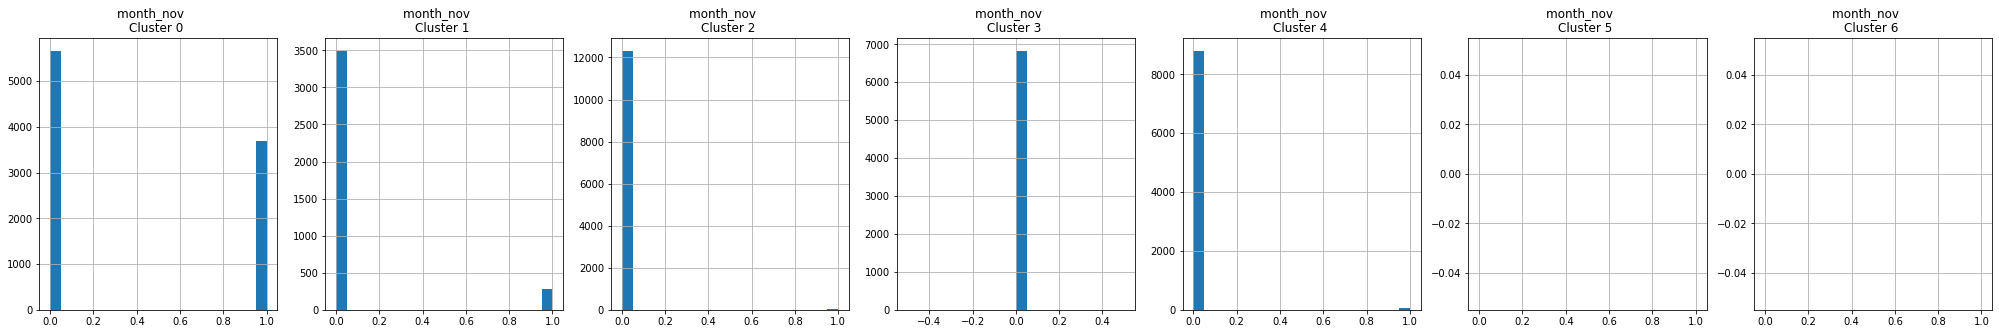

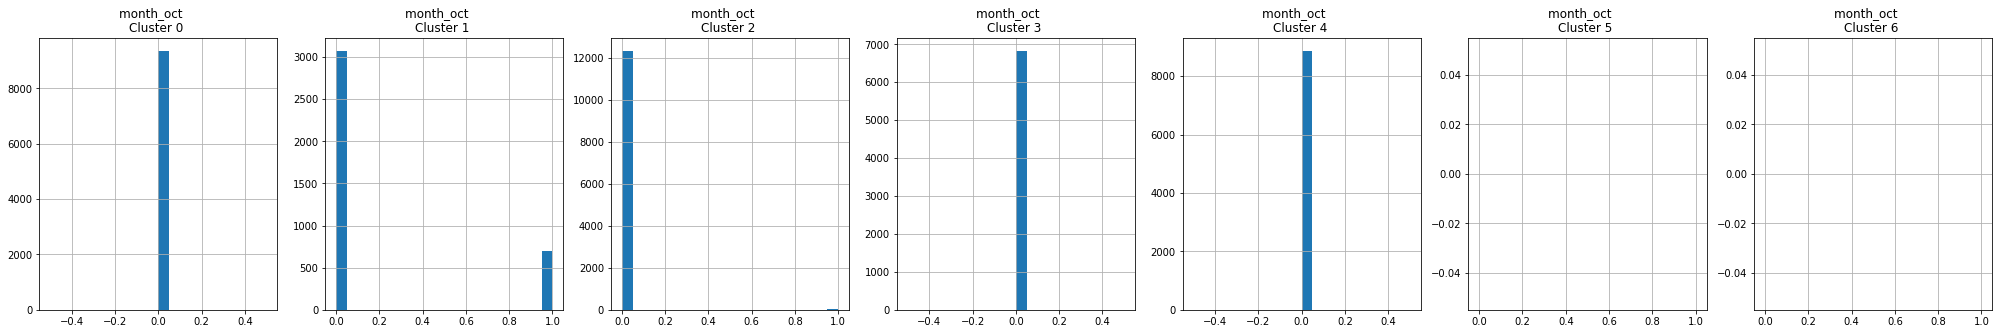

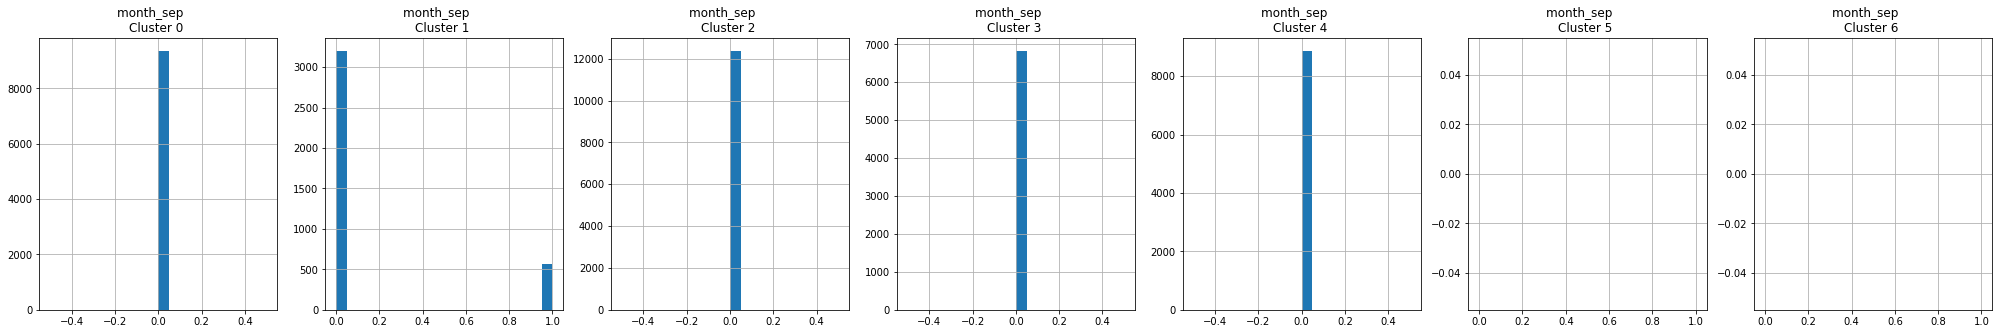

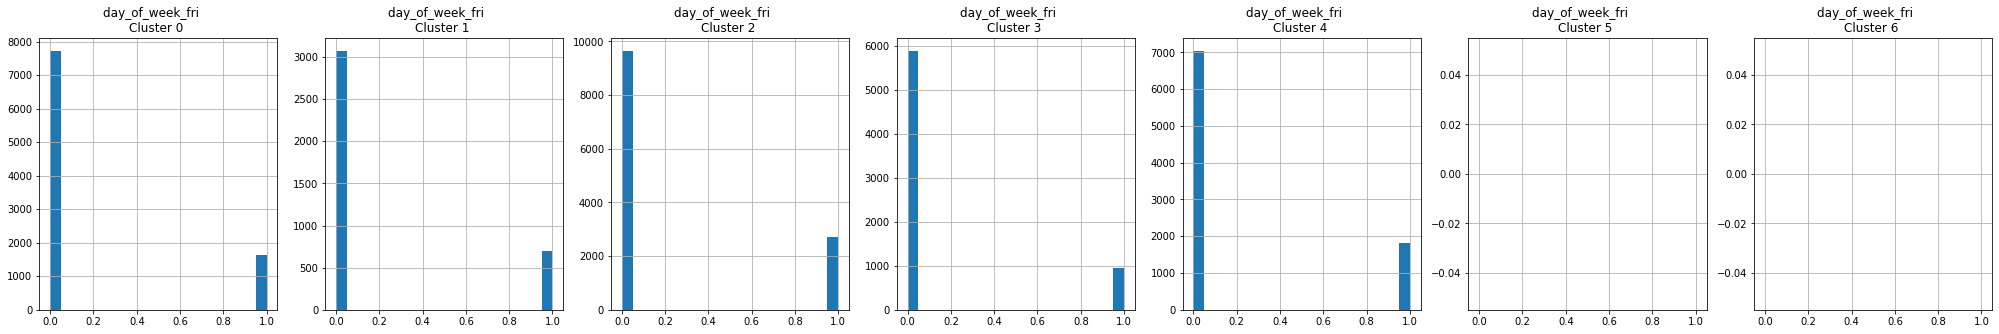

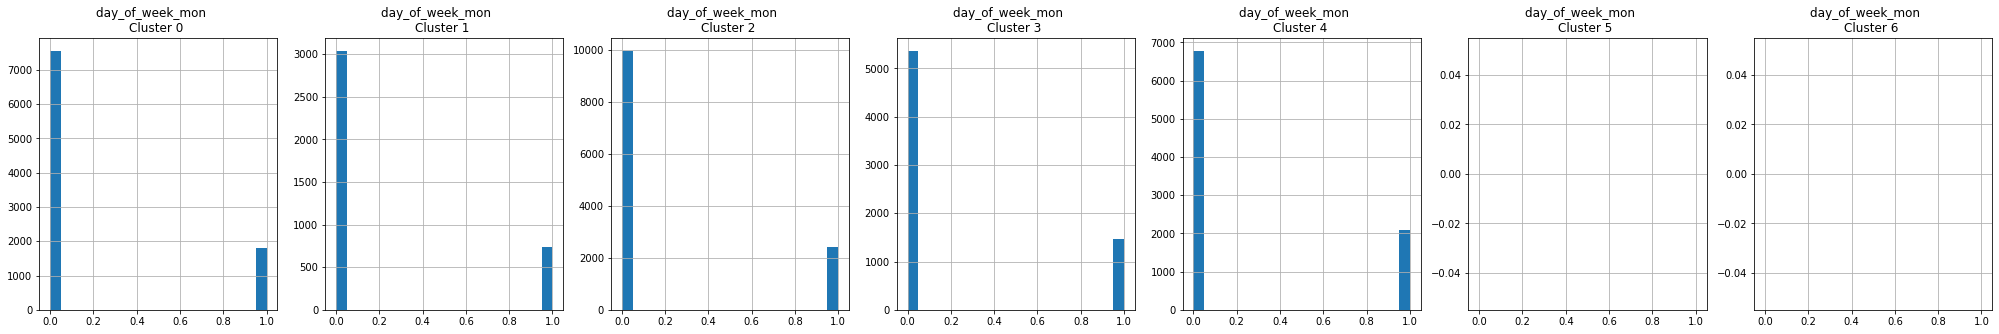

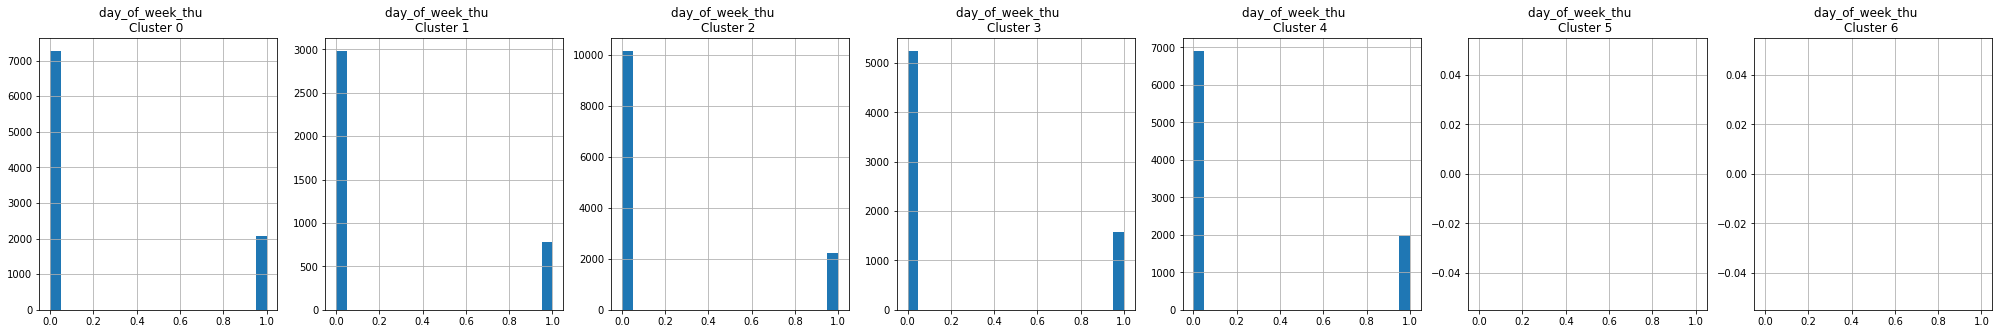

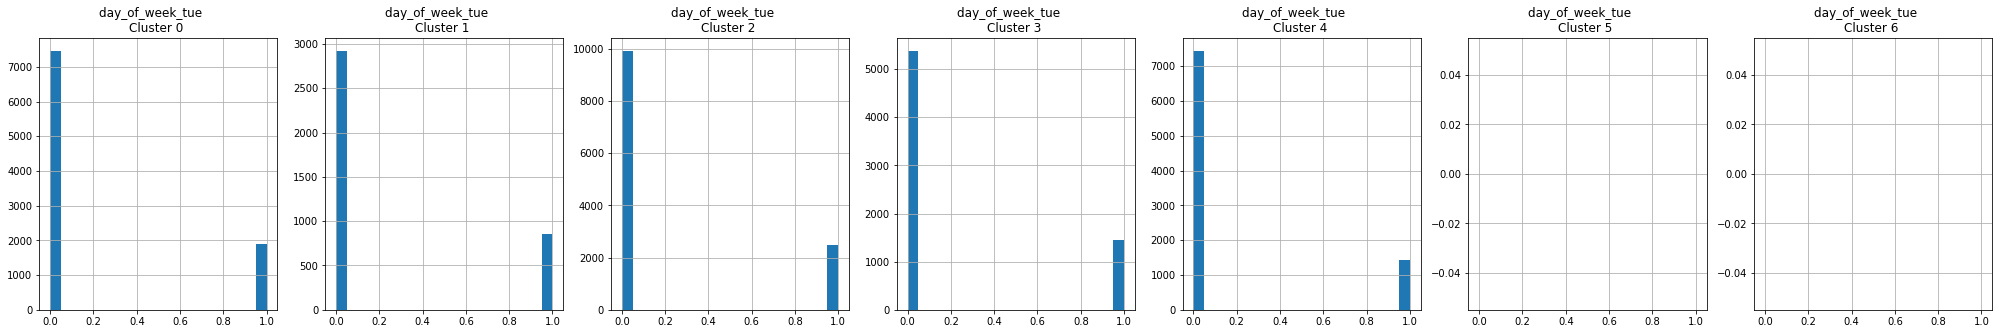

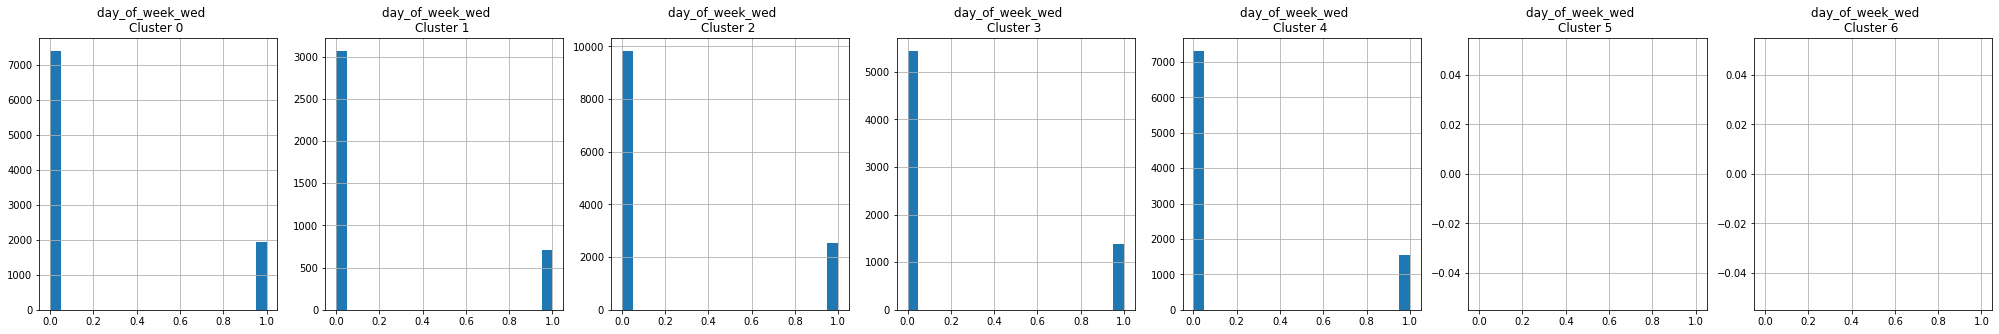

In [114]:
# Plotting the histogram of clusters
for i in df_final.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# 4. CREATING MODELS

In [63]:
# Splitting dataset into train and test subsets
X = df_final.drop(['target'],axis=1)
y = df_final['target']
%time X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

CPU times: user 24.9 ms, sys: 2.14 ms, total: 27 ms
Wall time: 28.2 ms


Logistic Regression

In [65]:
LR_model = LogisticRegression()
LR_model.fit (X_train, y_train)

LogisticRegression()

In [66]:
LR_predictions =  LR_model.predict(X_test)
print("\nPredicted values are:\n",LR_predictions)


Predicted values are:
 [0 0 0 ... 0 0 0]


In [67]:
LR_model.score(X_test,y_test)

0.9055596018451081

In [69]:
LR_model.score(X_train,y_train)

0.9017723977662933

Tunning hyperparameters - Logistic Regression - takes a lot of time

In [79]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [80]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LR_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [81]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.901483 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.901345 (0.003957) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.901345 (0.003957) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.901345 (0.003957) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.901345 (0.003972) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.901379 (0.003975) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.901368 (0.003983) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.901206 (0.004134) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.901183 (0.004162) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.901194 (0.004147) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.901345 (0.004011) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.901345 (0.004011) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.901483 (0.004024) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.900951 (0.002611) wit

All results are at around 0.9 accuracy.

Random Forest

In [82]:
RF_model = RandomForestClassifier(criterion='entropy', min_samples_split=200,  max_features='auto',
                                  max_leaf_nodes=None, verbose=0)
RF_model =RF_model.fit(X_train, y_train)


In [83]:
RF_predictions =  RF_model.predict(X_test)
print("\nPredicted values are:\n",RF_predictions)


Predicted values are:
 [0 0 0 ... 0 0 0]


In [84]:
RF_model.score(X_train,y_train)

0.9061426936283861

In [85]:
RF_model.score(X_test,y_test)

0.9029699765315206

Tunning hyperparameters - Random Forest - takes a lot of time

In [87]:
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [88]:
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=RF_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [89]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.903437 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.902570 (0.004015) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.903102 (0.003340) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.903437 (0.003437) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.902374 (0.003552) with: {'max_features': 'log2', 'n_estimators': 10}
0.901969 (0.003105) with: {'max_features': 'log2', 'n_estimators': 100}
0.902177 (0.003412) with: {'max_features': 'log2', 'n_estimators': 1000}


All results are at around 0.9 accuracy with very small differences.

K-Nearest Neighbours model

In [72]:
KNN_model = KNeighborsClassifier(25)
KNN_model.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [73]:
KNN_predictions =  KNN_model.predict(X_test)
print("\nPredicted values are:\n",KNN_predictions)


Predicted values are:
 [0 0 0 ... 0 0 0]


Tunning hyperparameters - K-Nearest Neighbours - it takes a lot of time

In [74]:
n_neighbors = range(1, 21, 2)
weights = ['uniform']
metric = ['euclidean', 'manhattan']

In [75]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=KNN_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [76]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.893379 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
0.868249 (0.004836) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.885002 (0.004280) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.887794 (0.003686) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.889633 (0.003826) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.890795 (0.002905) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.891315 (0.003205) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.892078 (0.003408) with: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
0.891696 (0.002232) with: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
0.891610 (0.001975) with: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'uniform'}
0.891610 (0.002817) with: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.869897 

The highest accuracy which can be obtained after tunning is at around 89%. 

# 5. Model Assessment

Accuracy of the models - main performance criterion

In [90]:
LR_accuracy = accuracy_score(y_test, LR_predictions)
RF_accuracy = accuracy_score(y_test, RF_predictions)
KNN_accuracy = accuracy_score(y_test, KNN_predictions)
print('\nLR accuracy score: \t %0.2f' % (LR_accuracy * 100))
print('RF accuracy score:\t %0.2f'    % (RF_accuracy * 100))
print('KNN accuracy score:\t %0.2f'   % (KNN_accuracy * 100))


LR accuracy score: 	 90.56
RF accuracy score:	 90.30
KNN accuracy score:	 88.86


All models have similar accuracy score at around 90%. Which is high. Logistic Regression has the highest accuracy.
K-nearest Neighbours has the lowest accuracy.

Precision scores - performance criterion

In [93]:
LR_precision = precision_score(y_test, LR_predictions)
RF_precision = precision_score(y_test, RF_predictions)
KNN_precision = precision_score(y_test, KNN_predictions)
print('\nLR precision score: \t %0.2f' % (LR_precision * 100))
print('RF precision score:\t %0.2f'    % (RF_precision * 100))
print('KNN precision score:\t %0.2f'   % (KNN_precision * 100))


LR precision score: 	 65.73
RF precision score:	 69.11
KNN precision score:	 57.83


Precision scores for the random forest model is the highest and for K-Nearest Neighbours is the lowest.
Those scores are not very high (confussion matrixes show why).

In general, based on the chosen performance criterion - accuracy - the best model is the Logistic Regression (90.56). However, it is not significantly better, as the Random Forest has the accuracy of 90.3. Also, looking at the Precision Scores Random Forest seems to be significantly better. K-Nearest Neighbours is certainly performing the worst based on the two measures.

Confusion matrixes

In [96]:
LR_conf_matrix = confusion_matrix(y_test, LR_predictions)
RF_conf_matrix = confusion_matrix(y_test, RF_predictions)
KNN_conf_matrix = confusion_matrix(y_test, KNN_predictions)
print('\nLogistic Regression model:\n',LR_conf_matrix)
print('\nRandom Forest:\n',RF_conf_matrix)
print('\nK-Nearest Neighbours model:\n',KNN_conf_matrix)


Logistic Regression model:
 [[10676   268]
 [  899   514]]

Random Forest:
 [[10771   173]
 [ 1026   387]]

K-Nearest Neighbours model:
 [[10847    97]
 [ 1280   133]]


For all models there is very high number of False Negative (higher than True Negative).
This is the effect of the target variable being very imbalanced. 

Text(33.0, 0.5, 'Predicted Values')

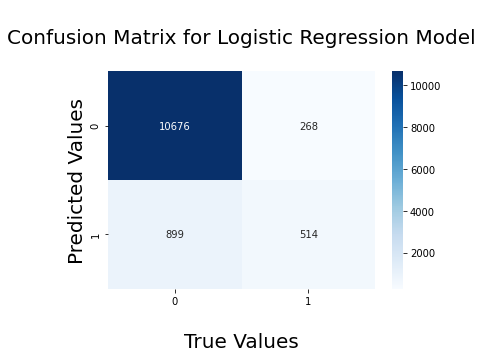

In [98]:
# Heatmap for Logistic Regression
LR_heatmap = sns.heatmap(LR_conf_matrix, cmap="Blues", annot=True, fmt="g")
plt.title('\nConfusion Matrix for Logistic Regression Model\n',size=20)
plt.xlabel('\nTrue Values',size=20)
plt.ylabel('Predicted Values',size=20)

For LR model the number of predictions stating that the customer said 'no' to subscribing and in reality the customer said no to subscribing to term deposit is 10676. Falsely predicted saying 'no' to subscribing is 268. 
The number of predictions stating that the customer said 'yes' to subscribing and in reality the customer said 'no' is 899. It is higher than "true negative"=514, which means that the predicted and factual response was 'yes'.

Text(33.0, 0.5, 'Predicted Values')

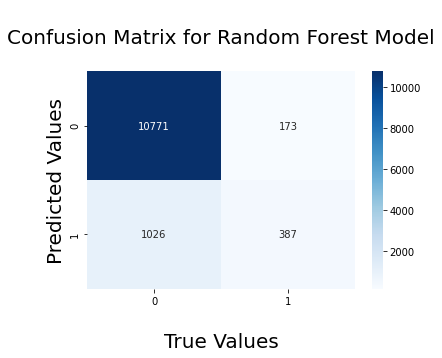

In [99]:
# Heatmap for Random Forest 
RF_heatmap = sns.heatmap(RF_conf_matrix, cmap="Blues", annot=True, fmt="g")
plt.title('\nConfusion Matrix for Random Forest Model\n',size=20)
plt.xlabel('\nTrue Values',size=20)
plt.ylabel('Predicted Values',size=20)

For Random Forest model the number of predictions stating that the customer said 'no' to subscribing and in reality the customer said no to subscribing to term deposit is 10771. Falsely predicted saying 'no' to subscribing is 173. 
The number of predictions stating that the customer said 'yes' to subscribing and in reality the customer said 'no' is 1026. It is higher than "true negative"=387, which means that the predicted and factual response was 'yes'.

Text(33.0, 0.5, 'Predicted Values')

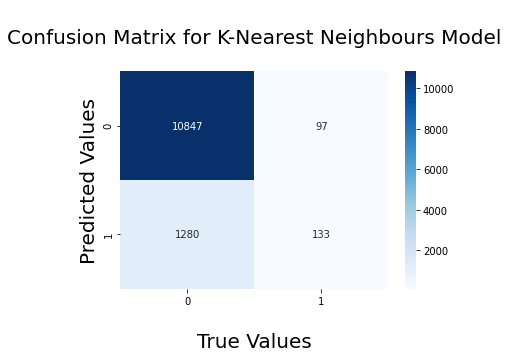

In [100]:
# Heatmap for K-Nearest Neighbours
KNN_heatmap = sns.heatmap(KNN_conf_matrix, cmap="Blues", annot=True, fmt="g")
plt.title('\nConfusion Matrix for K-Nearest Neighbours Model\n',size=20)
plt.xlabel('\nTrue Values',size=20)
plt.ylabel('Predicted Values',size=20)

For K-Nearest Neighbours model the number of predictions stating that the customer said 'no' to subscribing and in reality the customer said no to subscribing to term deposit is 10847. Falsely predicted saying 'no' to subscribing is 97. 
The number of predictions stating that the customer said 'yes' to subscribing and in reality the customer said 'no' is 1280. It is higher than "true negative"=133, which means that the predicted and factual response was 'yes'.

In [101]:
# ROC Curves for all models
LR_fpr, LR_tpr, LR_threshholds = roc_curve(y_test, LR_predictions,drop_intermediate=False)
RF_fpr, RF_tpr, RF_threshholds = roc_curve(y_test, RF_predictions, drop_intermediate=False)
KNN_fpr, KNN_tpr, KNN_threshholds = roc_curve(y_test, KNN_predictions)

In [102]:
LR_roc_auc = metrics.auc(LR_fpr, LR_tpr)
RF_roc_auc = metrics.auc(RF_fpr, RF_tpr)
KNN_roc_auc = metrics.auc(KNN_fpr, KNN_tpr)

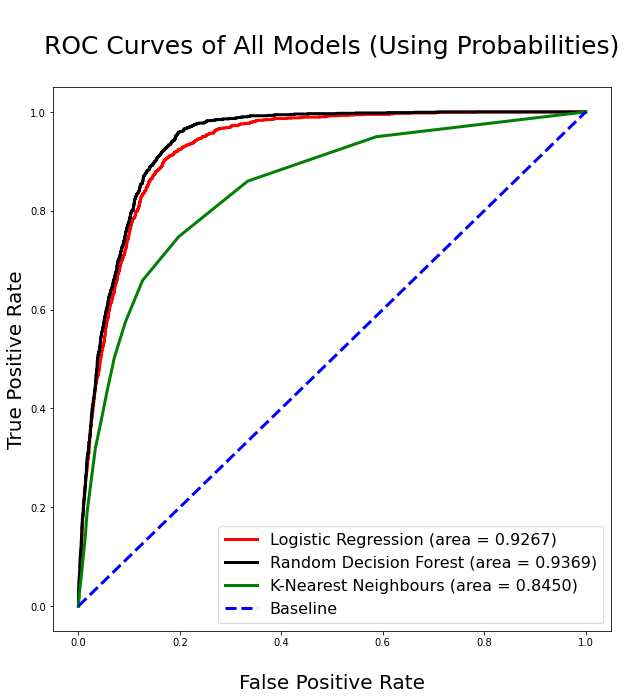

In [103]:
plt.figure(figsize=(10,10))
LR_y_pred_proba = LR_model.predict_proba(X_test)[:,1]
LR_fpr, LR_tpr, LR_threshholds = metrics.roc_curve(y_test,  LR_y_pred_proba)
LR_roc_auc = metrics.roc_auc_score(y_test, LR_y_pred_proba)
LR_line, = plt.plot(LR_fpr, LR_tpr, color='Red', lw=3, label='Logistic Regression (area = %0.4f)' % LR_roc_auc)
RF_y_pred_proba = RF_model.predict_proba(X_test)[:,1]
RF_fpr, RF_tpr, RF_threshholds = metrics.roc_curve(y_test,  RF_y_pred_proba)
RF_roc_auc = metrics.roc_auc_score(y_test, RF_y_pred_proba)
RF_line, = plt.plot(RF_fpr,RF_tpr,color='Black', lw=3, label='Random Decision Forest (area = %0.4f)' % RF_roc_auc)
KNN_y_pred_proba = KNN_model.predict_proba(X_test)[:,1]
KNN_fpr, KNN_tpr, KNN_threshholds = metrics.roc_curve(y_test,  KNN_y_pred_proba)
KNN_roc_auc = metrics.roc_auc_score(y_test, KNN_y_pred_proba)
KNN_line, = plt.plot(KNN_fpr,KNN_tpr,color='Green', lw=3, label='K-Nearest Neighbours (area = %0.4f)' % KNN_roc_auc)
baseline, = plt.plot([0, 1], [0, 1], color='Blue', lw=3, label='Baseline', linestyle='--')

plt.xlabel('\nFalse Positive Rate',size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('\nROC Curves of All Models (Using Probabilities)\n',size=25)
plt.legend(loc="lower right",handles=[LR_line, RF_line, KNN_line, baseline], prop={'size': 16})
plt.show()


The AUC for Logistic Regression is 0.927, for Decision Forest is 0.937 and for K-nearest Neighbours is 0.845. 
All results are satisfactory.
Taking accuracy, precision and AUC measures into consideration, the best performing model is the Random Forest, with Logistic Regression close behind. 
However, it is neccassary to remeber that any model constructed is able to predict the client actually subscribing to the term deposit. All models are efficient only in predicting customers who will not subscribe to the term deposit, which is the result of the data being imbalanced in terms of the target variable. 

# 6. Summary
Even though it was said that the dataset contained no missing values, there was a lot of variables which contained the answers 'non-existent', 'unknown' etc. In some variables based on other combinations such values were imputed. When they were the majority of responses, variables were deleted. Also some numeric variables contained outliers, which were dealt with thanks to the method of winsorization. Numerical variables were also standarized and variables for which the correlation was big were deleted from the dataframe. All categorical variables were encoded, to make it possible to use them in models. 
Then the data was divided into train (70%) and test (30%) sets. They were used to generate three models: Logistic Regression, Random Forest and K-Nearest Neighbours. Based on all measures (accuracy, precision and AUC) the best model turned out to be Random Forest. However as said before, the models are only good for predicting which customers will not subscribe to the term deposit. In general to make better predictions about which customer would subscribe to the term deposit the data could be under-sampled, however then a lot of observations would be missed.